# 📈 Análisis Exploratorio de Datos para Intelligent Credit Scoring Pipeline

## 1. 🚀 Introducción

### 1.1 🎯 Propósito del EDA
Este Análisis Exploratorio de Datos (EDA) tiene como objetivo examinar el dataset `train.csv` del proyecto *Intelligent Credit Scoring Pipeline* para identificar patrones, relaciones y anomalías que permitan preparar los datos de manera eficiente para predecir la variable objetivo **`Puntaje_Credito`**. Buscamos responder preguntas clave: ¿Qué factores influyen en el puntaje crediticio? ¿Existen variables redundantes o irrelevantes? ¿Qué transformaciones son necesarias antes de construir un modelo predictivo?

### 1.2 📋 Contexto del Dataset
El dataset contiene 100,000 registros y 28 columnas con información financiera y personal de clientes, incluyendo ingresos, deudas, historial crediticio y comportamiento de pago. Proviene de un entorno de evaluación crediticia y está almacenado en `../data/raw/origin/train.csv`. La variable objetivo, **`Puntaje_Credito`**, clasifica a los clientes en categorías como "Good", "Standard" y "Poor", representando su riesgo crediticio. Este EDA es el primer paso para entender la estructura de los datos y optimizarlos para un pipeline de machine learning.

### 1.3 🗂️ Estructura del Documento
El análisis está organizado en las siguientes secciones:  
1. **⚙️ Configuración Inicial**: Preparación de herramientas y carga de datos.  
2. **🧹 Limpieza de Datos**: Corrección de inconsistencias y preparación inicial.  
3. **📊 Análisis Univariado**: Exploración de distribuciones individuales.  
4. **🔍 Análisis Bivariado**: Relaciones entre variables y el objetivo.  
5. **📉 Análisis de Correlaciones**: Identificación de dependencias numéricas.  
6. **🏆 Evaluación de Importancia**: Priorización de variables predictivas.  
7. **✅ Decisiones sobre el Dataset**: Selección y transformación de columnas.  
8. **📝 Conclusiones y Recomendaciones**: Resumen y próximos pasos.

---

## 2. ⚙️ Mi Configuración Inicial

### 2.1 📥 Mi Importación de Librerías
Cargo las herramientas esenciales para mi análisis exploratorio, asegurando que cubran manipulación de datos, visualización y modelado inicial. Estas son las librerías que necesito:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### 2.2 Carga del Dataset
Cargamos el archivo `train.csv` desde la ruta especificada en el proyecto, asegurándonos de trabajar con los datos crudos originales.

In [3]:
# Ruta al archivo local
file_path = "../data/raw/train.csv"

# Cargar el dataset en un DataFrame
df = pd.read_csv(file_path)

### 2.3 Vista Preliminar
Ajustamos la visualización de Pandas y mostramos una vista inicial del dataset para entender su estructura, tipos de datos y posibles problemas.

In [4]:
# Ajustar opciones de visualización de Pandas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', 1000)        # Evitar cortes en la salida
pd.set_option('display.max_colwidth', None) # Mostrar contenido completo de las columnas

# Mostrar las primeras 5 filas
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [5]:
# Resumen de tipos de datos y valores nulos
print("\nInformación del dataset:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan       

## 3. 🧹 Mi Limpieza de Datos

### 3.1 ✂️ Mi Eliminación de Espacios en Blanco
Elimino espacios en blanco al inicio y final de los valores en columnas de tipo string para garantizar consistencia en mis datos.

In [6]:
# Función para limpiar espacios en blanco
def limpiar_espacios(df):
    return df.map(lambda x: x.strip() if isinstance(x, str) else x)

# Aplicar la función al DataFrame
df = limpiar_espacios(df)

### 3.2 Revisión de Valores Nulos
Contamos valores nulos por columna y definimos una estrategia según los resultados.

In [7]:
# Contar valores nulos por columna
nulos = df.isnull().sum()
print("Valores nulos por columna:")
print(nulos)

# Estrategia: Si hay nulos, decidir según porcentaje
total_filas = len(df)
for columna, count in nulos.items():
    porcentaje = (count / total_filas) * 100
    if count > 0:
        print(f"{columna}: {count} nulos ({porcentaje:.2f}%)")
        if porcentaje < 1:
            df = df.dropna(subset=[columna])  # Eliminar si <1%
        else:
            # Imputar con mediana (numéricas) o moda (categóricas)
            if df[columna].dtype in ['float64', 'int64']:
                df[columna].fillna(df[columna].median(), inplace=True)
            else:
                df[columna].fillna(df[columna].mode()[0], inplace=True)

Valores nulos por columna:
ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


### 3.3 Detección de Duplicados
Verificamos y eliminamos registros duplicados para evitar redundancias.

In [8]:
# Contar duplicados
duplicados = df.duplicated().sum()
print(f"Número de registros duplicados: {duplicados}")

# Eliminar duplicados y resetear índice
if duplicados > 0:
    df = df.drop_duplicates()
    df = df.reset_index(drop=True)
    print("Duplicados eliminados. Nuevo tamaño del DataFrame:", df.shape)

Número de registros duplicados: 0


### 3.4 Verificación de Tipos de Datos
Confirmamos que los tipos de datos sean adecuados para cada columna.

In [9]:
# Mostrar tipos de datos actuales
print("Tipos de datos por columna:")
print(df.dtypes)

# Lista de columnas esperadas como numéricas
numericas = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 
             'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 
             'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 
             'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 
             'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']

# Lista de columnas esperadas como categóricas
categoricas = ['Name', 'SSN', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 
               'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']

# Corregir tipos si es necesario
for col in numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convierte a numérico, NaN si falla

for col in categoricas:
    df[col] = df[col].astype('object')  # Asegura tipo object para categóricas

# Verificar correcciones
print("\nTipos de datos corregidos:")
print(df.dtypes)

Tipos de datos por columna:
ID                            int64
Customer_ID                   int64
Month                         int64
Name                         object
Age                         float64
SSN                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64


### 3.5 Traducción de Columnas
Renombramos las columnas al español para mayor claridad y consistencia.

In [10]:
# Diccionario de traducción
columnas_espanol = {
    'ID': 'ID',
    'Customer_ID': 'ID_Cliente',
    'Month': 'Mes',
    'Name': 'Nombre',
    'Age': 'Edad',
    'SSN': 'Numero_Seguro_Social',
    'Occupation': 'Ocupacion',
    'Annual_Income': 'Ingreso_Anual',
    'Monthly_Inhand_Salary': 'Salario_Mensual',
    'Num_Bank_Accounts': 'Num_Cuentas_Bancarias',
    'Num_Credit_Card': 'Num_Tarjetas_Credito',
    'Interest_Rate': 'Tasa_Interes',
    'Num_of_Loan': 'Num_Prestamos',
    'Type_of_Loan': 'Tipo_Prestamo',
    'Delay_from_due_date': 'Retraso_Pago',
    'Num_of_Delayed_Payment': 'Num_Pagos_Retrasados',
    'Changed_Credit_Limit': 'Cambio_Limite_Credito',
    'Num_Credit_Inquiries': 'Num_Consultas_Credito',
    'Credit_Mix': 'Mezcla_Crediticia',
    'Outstanding_Debt': 'Deuda_Pendiente',
    'Credit_Utilization_Ratio': 'Ratio_Utilizacion_Credito',
    'Credit_History_Age': 'Edad_Historial_Credito',
    'Payment_of_Min_Amount': 'Pago_Minimo',
    'Total_EMI_per_month': 'Total_Cuota_Mensual',
    'Amount_invested_monthly': 'Inversion_Mensual',
    'Payment_Behaviour': 'Comportamiento_Pago',
    'Monthly_Balance': 'Saldo_Mensual',
    'Credit_Score': 'Puntaje_Credito'
}

# Aplicar renombramiento
df.rename(columns=columnas_espanol, inplace=True)
print("Columnas renombradas al español.")

Columnas renombradas al español.


### 3.6 Diccionario de Datos
Creamos una tabla de referencia con las columnas y sus descripciones.

In [11]:
# Diccionario de datos como DataFrame
diccionario_datos = pd.DataFrame({
    'Columna': [
        'ID', 'ID_Cliente', 'Mes', 'Nombre', 'Edad', 'Numero_Seguro_Social', 'Ocupacion',
        'Ingreso_Anual', 'Salario_Mensual', 'Num_Cuentas_Bancarias', 'Num_Tarjetas_Credito',
        'Tasa_Interes', 'Num_Prestamos', 'Tipo_Prestamo', 'Retraso_Pago', 'Num_Pagos_Retrasados',
        'Cambio_Limite_Credito', 'Num_Consultas_Credito', 'Mezcla_Crediticia', 'Deuda_Pendiente',
        'Ratio_Utilizacion_Credito', 'Edad_Historial_Credito', 'Pago_Minimo', 'Total_Cuota_Mensual',
        'Inversion_Mensual', 'Comportamiento_Pago', 'Saldo_Mensual', 'Puntaje_Credito'
    ],
    'Descripción': [
        'Identificador único del registro',
        'Identificador único del cliente',
        'Mes del año (1-12)',
        'Nombre del cliente',
        'Edad del cliente',
        'Número de Seguro Social del cliente',
        'Ocupación del cliente',
        'Ingreso anual del cliente',
        'Salario mensual neto del cliente',
        'Número de cuentas bancarias del cliente',
        'Número de tarjetas de crédito del cliente',
        'Tasa de interés promedio de créditos',
        'Número de préstamos activos',
        'Tipos de préstamos del cliente',
        'Días promedio de retraso en pagos',
        'Número de pagos retrasados',
        'Cambio porcentual en el límite de crédito',
        'Número de consultas crediticias',
        'Calidad de la mezcla de créditos (Good, Standard, Bad)',
        'Deuda total pendiente',
        'Porcentaje de uso del crédito disponible',
        'Edad del historial crediticio en meses',
        'Indica si paga solo el mínimo (Yes/No)',
        'Total de cuotas mensuales por préstamos',
        'Monto invertido mensualmente',
        'Patrón de comportamiento de pago',
        'Saldo disponible mensual',
        'Puntaje crediticio del cliente (Good, Standard, Poor)'
    ]
})

# Mostrar tabla
print("Diccionario de Datos:")
print(diccionario_datos.to_markdown(index=False))

Diccionario de Datos:
| Columna                   | Descripción                                            |
|:--------------------------|:-------------------------------------------------------|
| ID                        | Identificador único del registro                       |
| ID_Cliente                | Identificador único del cliente                        |
| Mes                       | Mes del año (1-12)                                     |
| Nombre                    | Nombre del cliente                                     |
| Edad                      | Edad del cliente                                       |
| Numero_Seguro_Social      | Número de Seguro Social del cliente                    |
| Ocupacion                 | Ocupación del cliente                                  |
| Ingreso_Anual             | Ingreso anual del cliente                              |
| Salario_Mensual           | Salario mensual neto del cliente                       |
| Num_Cuentas_Bancari

# ✨ Resultados de la Limpieza de Datos

Tras realizar la limpieza del dataset **`train.csv`**, estos son los hallazgos clave:

- 🧹 **Espacios en blanco eliminados**: Se limpiaron las columnas de tipo string, garantizando consistencia en los valores.  
- ✅ **Sin valores nulos**: Las 28 columnas muestran 0 datos faltantes, reflejando una integridad sólida con **100,000 registros completos**.  
- 🔍 **Sin duplicados**: No se encontraron registros repetidos, confirmando la unicidad de los datos.  
- ⚙️ **Tipos de datos ajustados**:  
  - Columnas como **`Numero_Seguro_Social`** pasaron de `float` a `object` para reflejar su naturaleza categórica.  
  - Variables numéricas (ej. **`Edad`**, **`Deuda_Pendiente`**) se mantuvieron en `float64` o `int64` según corresponda.  
- 🌍 **Columnas en español**: Se renombraron (ej. `Age` → **`Edad`**) para mayor claridad.  
- 📖 **Diccionario de datos**: Se creó una tabla detallada como referencia rápida.  

### 🚀 Conclusión  
Estos resultados indican que el dataset está **limpio y bien estructurado**, listo para el análisis univariado y bivariado con foco en **`Puntaje_Credito`**. ¡A por el siguiente paso!

---

## 4. Análisis Univariado

### 4.1 📊 Análisis Univariado: Variables Numéricas

En esta sección, exploraremos las columnas numéricas del dataset `train.csv` para entender sus distribuciones, rangos y posibles anomalías. Usaremos estadísticas descriptivas (`df.describe()`) para obtener medidas como media, mediana y desviación estándar, enfocándonos en variables clave como `Edad`, `Salario_Mensual`, `Deuda_Pendiente`, `Edad_Historial_Credito`, `Tasa_Interes` y `Retraso_Pago`. Generaremos histogramas (`plt.hist()`) para visualizar distribuciones y boxplots (`sns.boxplot()`) para detectar outliers. El objetivo es identificar patrones iniciales y resumirlos en 2-3 observaciones por variable, preparando el terreno para relacionarlas con `Puntaje_Credito` en pasos posteriores.

In [12]:
df.describe()

,ID,ID_Cliente,Mes,Edad,Ingreso_Anual,Salario_Mensual,Num_Cuentas_Bancarias,Num_Tarjetas_Credito,Tasa_Interes,Num_Prestamos,Retraso_Pago,Num_Pagos_Retrasados,Cambio_Limite_Credito,Num_Consultas_Credito,Deuda_Pendiente,Ratio_Utilizacion_Credito,Edad_Historial_Credito,Total_Cuota_Mensual,Inversion_Mensual,Saldo_Mensual
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696



Estadísticas de Retraso_Pago:
count    100000.00000
mean         21.08141
std          14.80456
min           0.00000
25%          10.00000
50%          18.00000
75%          28.00000
max          62.00000
Name: Retraso_Pago, dtype: float64


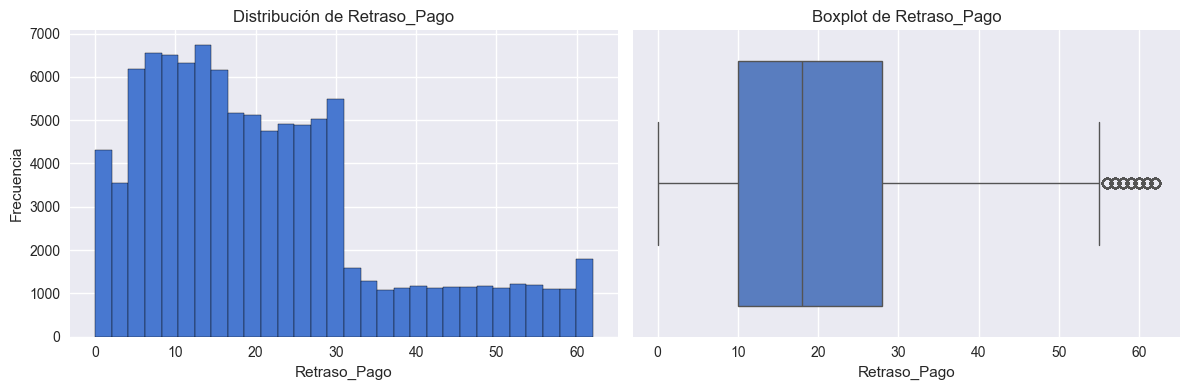


Estadísticas de Num_Pagos_Retrasados:
count    100000.000000
mean         13.313120
std           6.237166
min           0.000000
25%           9.000000
50%          14.000000
75%          18.000000
max          25.000000
Name: Num_Pagos_Retrasados, dtype: float64


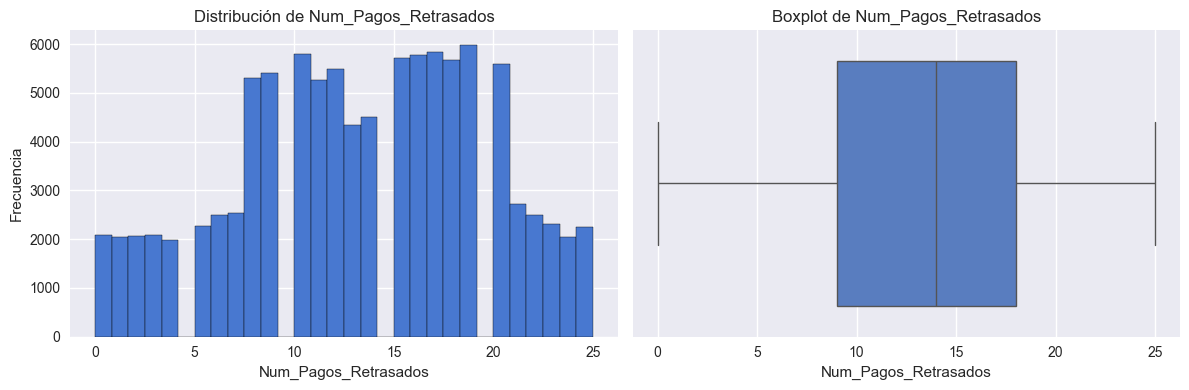


Estadísticas de Deuda_Pendiente:
count    100000.000000
mean       1426.220376
std        1155.129026
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4998.070000
Name: Deuda_Pendiente, dtype: float64


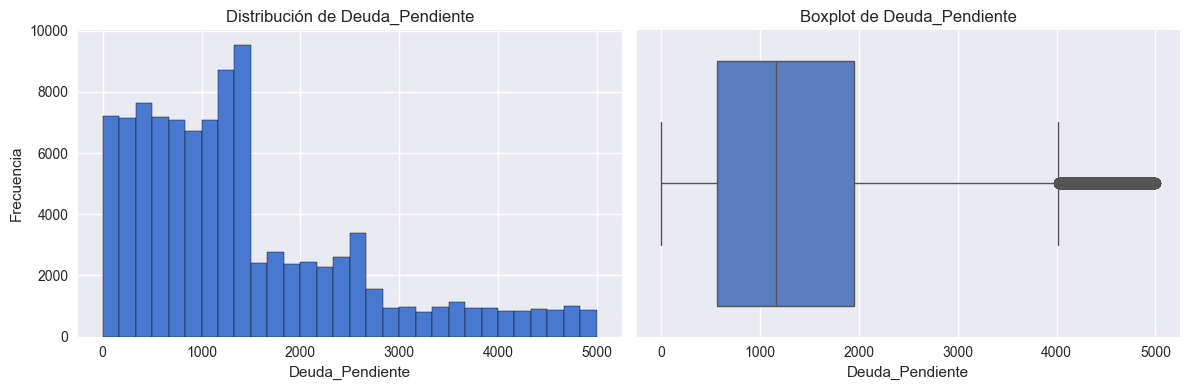


Estadísticas de Ratio_Utilizacion_Credito:
count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: Ratio_Utilizacion_Credito, dtype: float64


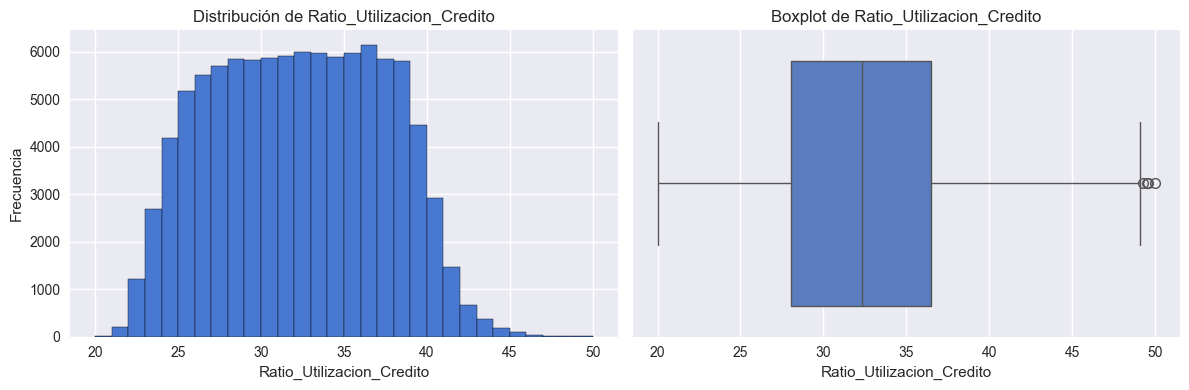


Estadísticas de Edad_Historial_Credito:
count    100000.000000
mean        221.220460
std          99.680716
min           1.000000
25%         144.000000
50%         219.000000
75%         302.000000
max         404.000000
Name: Edad_Historial_Credito, dtype: float64


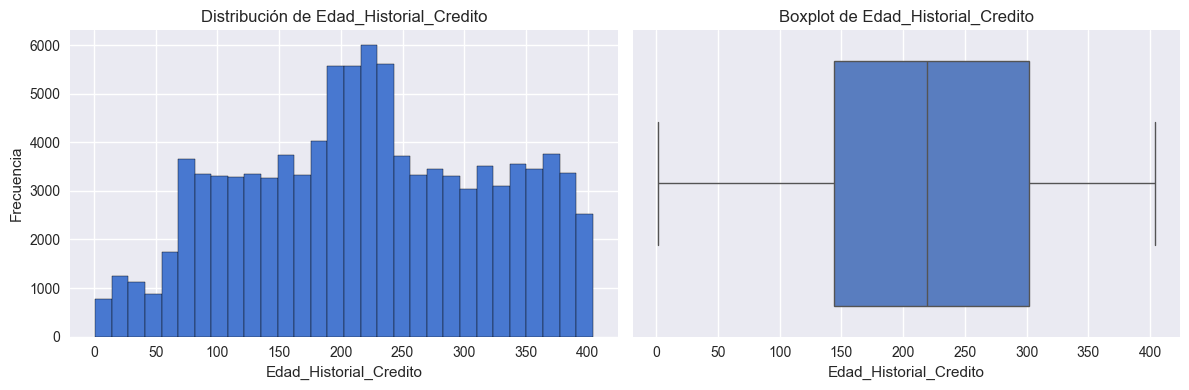


Estadísticas de Tasa_Interes:
count    100000.00000
mean         14.53208
std           8.74133
min           1.00000
25%           7.00000
50%          13.00000
75%          20.00000
max          34.00000
Name: Tasa_Interes, dtype: float64


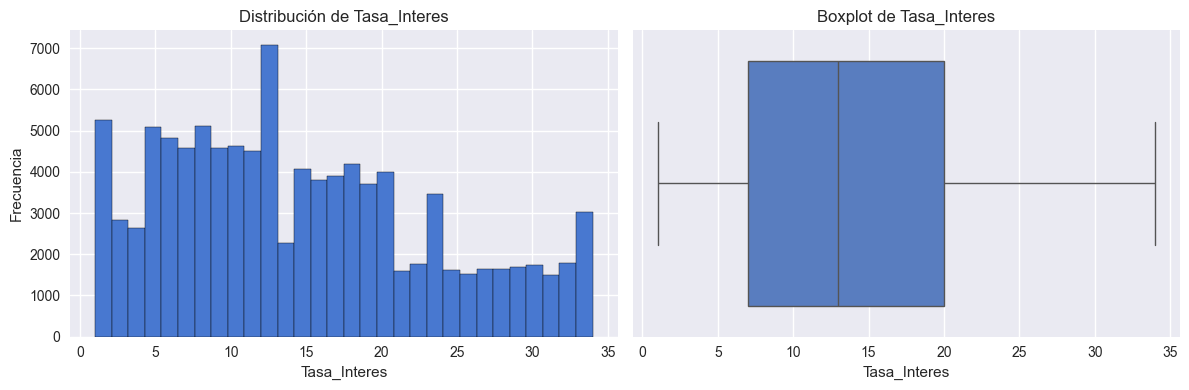


Estadísticas de Num_Consultas_Credito:
count    100000.000000
mean          5.798250
std           3.867826
min           0.000000
25%           3.000000
50%           5.000000
75%           8.000000
max          17.000000
Name: Num_Consultas_Credito, dtype: float64


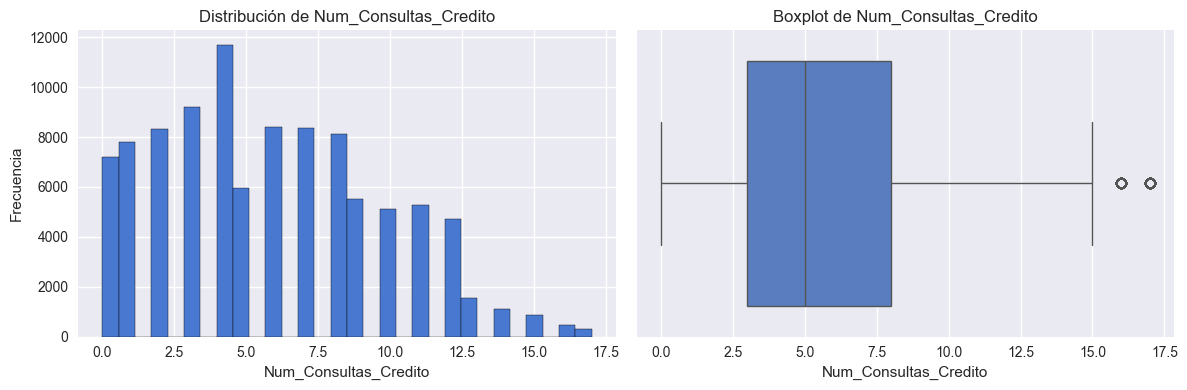


Estadísticas de Cambio_Limite_Credito:
count    100000.000000
mean         10.470323
std           6.609481
min           0.500000
25%           5.380000
50%           9.400000
75%          14.850000
max          29.980000
Name: Cambio_Limite_Credito, dtype: float64


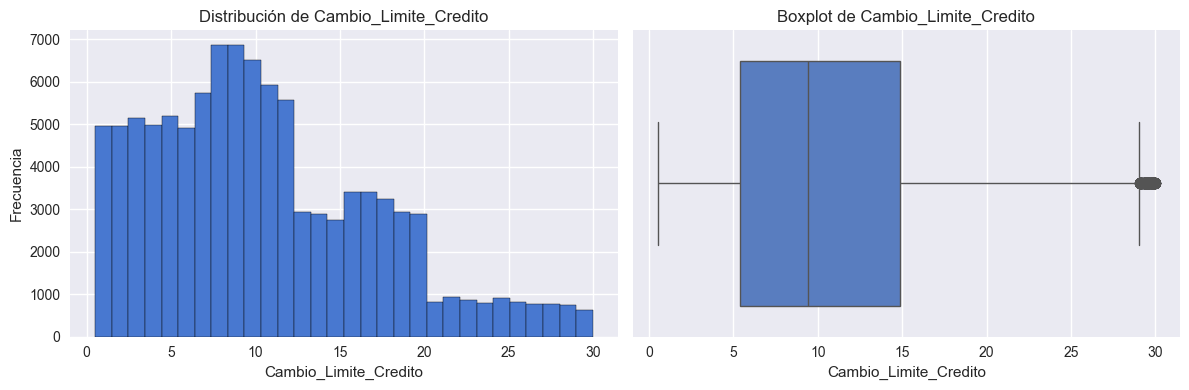


Estadísticas de Total_Cuota_Mensual:
count    100000.000000
mean        107.699208
std         132.267056
min           0.000000
25%          29.268886
50%          66.462304
75%         147.392573
max        1779.103254
Name: Total_Cuota_Mensual, dtype: float64


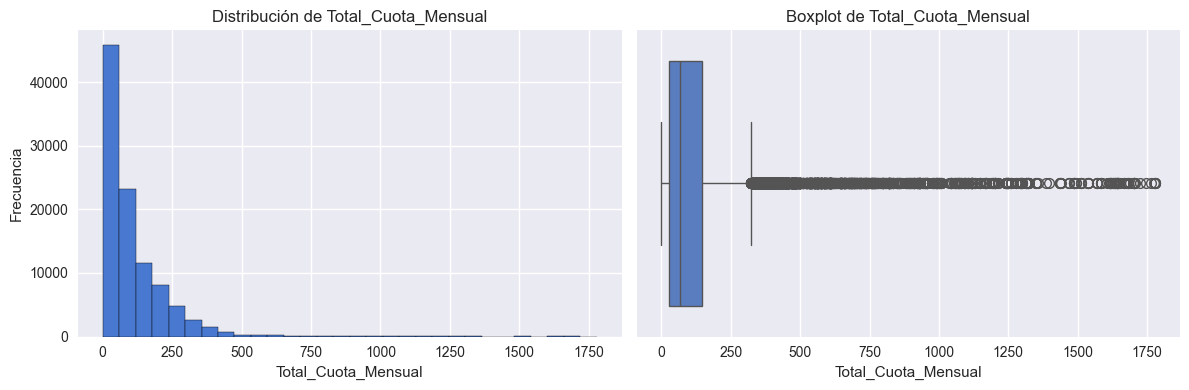


Estadísticas de Inversion_Mensual:
count    100000.000000
mean         55.101315
std          39.006932
min           0.000000
25%          27.959111
50%          45.156550
75%          71.295797
max         434.191089
Name: Inversion_Mensual, dtype: float64


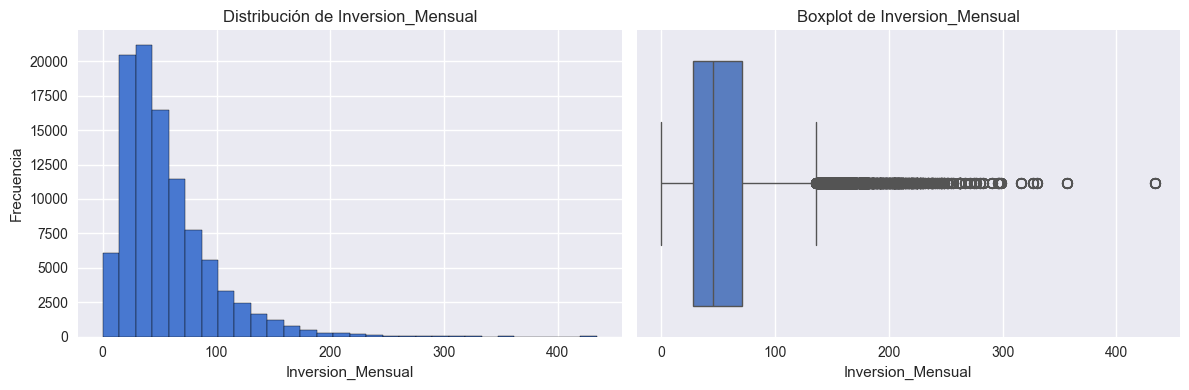


Estadísticas de Saldo_Mensual:
count    100000.000000
mean        392.697586
std         201.652719
min           0.007760
25%         267.615983
50%         333.865366
75%         463.215683
max        1183.930696
Name: Saldo_Mensual, dtype: float64


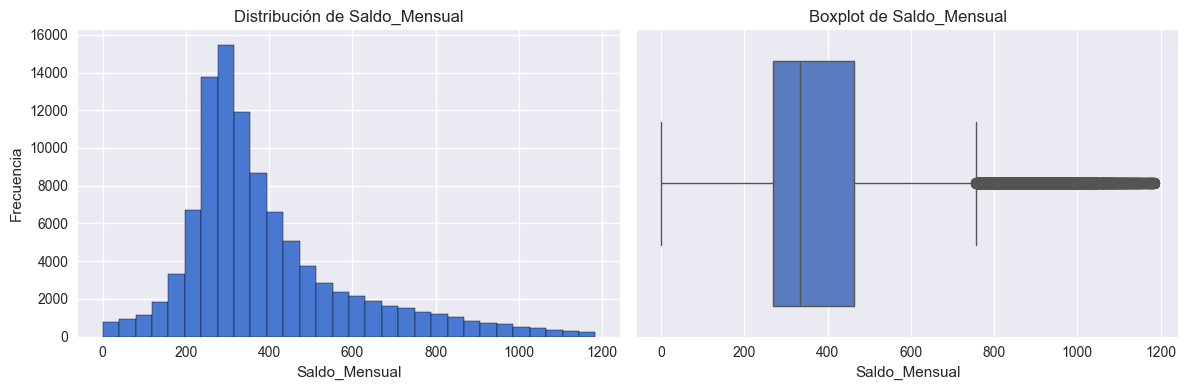

In [13]:
# Seleccionar variables numéricas relacionadas con el comportamiento crediticio
variables_comportamiento = ['Retraso_Pago', 'Num_Pagos_Retrasados', 'Deuda_Pendiente', 
                           'Ratio_Utilizacion_Credito', 'Edad_Historial_Credito', 
                           'Tasa_Interes', 'Num_Consultas_Credito', 'Cambio_Limite_Credito',
                           'Total_Cuota_Mensual', 'Inversion_Mensual', 'Saldo_Mensual']

# Configurar el estilo de las gráficas
plt.style.use('seaborn-v0_8')  # Estilo limpio y moderno
sns.set_palette("muted")       # Colores suaves

# Crear una figura para histogramas y boxplots
for var in variables_comportamiento:
    # Estadísticas descriptivas
    print(f"\nEstadísticas de {var}:")
    print(df[var].describe())
    
    # Crear subplots: histograma y boxplot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histograma
    ax1.hist(df[var], bins=30, edgecolor='black')
    ax1.set_title(f'Distribución de {var}')
    ax1.set_xlabel(var)
    ax1.set_ylabel('Frecuencia')
    
    # Boxplot
    sns.boxplot(x=df[var], ax=ax2)
    ax2.set_title(f'Boxplot de {var}')
    ax2.set_xlabel(var)
    
    # Ajustar diseño
    plt.tight_layout()
    plt.show()

# 📊 Mis Conclusiones del Análisis Univariado: Comportamiento Crediticio

Tras analizar las variables numéricas relacionadas con el comportamiento crediticio del dataset `train.csv`, aquí presento mis conclusiones, mi estrategia para mejorar los datos y algunas ideas adicionales que considero relevantes:

---

### Mis Conclusiones Clave

1. **Retraso_Pago (Días promedio de retraso)**  
   - Observé que la media es de 21 días, con un rango amplio (0 a 62 días) y una desviación estándar alta (14.8), lo que me indica una variabilidad significativa.  
   - Noté que el 75% de los clientes tiene retrasos de hasta 28 días, pero hay casos extremos que llegan a 62 días, lo que me hace sospechar de outliers o comportamientos de riesgo.  
   - Creo que la distribución está sesgada a la derecha, con más frecuencia en retrasos cortos.

2. **Num_Pagos_Retrasados (Número de pagos retrasados)**  
   - Encontré una media de 13.3 pagos retrasados, con un máximo de 25 y una desviación estándar moderada (6.2).  
   - Vi que la mediana (14) está cerca de la media, lo que me sugiere una distribución bastante simétrica, pero con concentración entre 9 y 18 retrasos (percentiles 25% y 75%).  
   - Me sorprendió que pocos clientes tengan 0 retrasos, lo que podría reflejar un patrón general de incumplimiento leve.

3. **Deuda_Pendiente (Deuda total)**  
   - Calculé una media de 1,426, pero con un rango amplio (0.23 a 4,998) y alta dispersión (std: 1,155), lo que me indica que los niveles de endeudamiento varían mucho.  
   - Observé que el 50% de los clientes tiene deudas por debajo de 1,166, pero el 25% superior supera los 1,945, con valores extremos cerca de 5,000.  
   - Pienso que la distribución está sesgada a la derecha, algo típico en variables financieras.

4. **Ratio_Utilizacion_Credito (Uso del crédito disponible)**  
   - Noté una media de 32.3% y una baja desviación (5.1), con un rango de 20% a 50%, lo que me sugiere un comportamiento bastante uniforme.  
   - Vi que la mayoría está entre 28% y 36.5% (percentiles 25% y 75%), y no parece haber outliers extremos.  
   - Imagino que la distribución es simétrica o ligeramente sesgada, mostrando un uso moderado del crédito.

5. **Edad_Historial_Credito (Meses de historial)**  
   - Calculé una media de 221 meses (~18 años), con un rango de 1 a 404 meses y alta dispersión (std: 99.7).  
   - Noté que el 50% tiene entre 144 y 302 meses (~12 a 25 años), pero me llamó la atención valores muy bajos (1 mes) que podrían ser nuevos clientes o datos anómalos.  
   - Creo que la distribución podría ser uniforme, con algunos picos en rangos comunes de historial.

6. **Tasa_Interes (Tasa promedio de créditos)**  
   - Encontré una media de 14.5%, con un rango de 1% a 34% y una desviación notable (8.7).  
   - Vi que el 50% tiene tasas entre 7% y 20%, pero tasas cercanas al 34% me hacen pensar en préstamos de alto riesgo.  
   - Sospecho que la distribución podría ser bimodal, separando tasas bajas y altas.

7. **Num_Consultas_Credito (Consultas crediticias)**  
   - Observé una media de 5.8 consultas, con un máximo de 17 y desviación moderada (3.9).  
   - Noté que la mayoría está entre 3 y 8 consultas, pero valores por encima de 12 me parecen inusuales, quizás por búsqueda excesiva de crédito.  
   - Pienso que la distribución está sesgada a la derecha, con pocos clientes sin consultas.

8. **Cambio_Limite_Credito (Cambio porcentual en límite)**  
   - Calculé una media de 10.5%, con un rango de 0.5% a 29.98% y desviación de 6.6.  
   - Vi que el 50% tiene cambios entre 5.4% y 14.85%, pero valores cercanos al 30% son raros.  
   - Imagino que la distribución es simétrica, con algunos outliers en el extremo superior.

9. **Total_Cuota_Mensual (Cuotas mensuales)**  
   - Encontré una media de 107.7, pero con alta dispersión (std: 132.3) y un máximo de 1,779, lo que me indica casos extremos.  
   - Noté que el 75% paga hasta 147.4, pero valores superiores a 1,000 me parecen outliers.  
   - Creo que la distribución está muy sesgada a la derecha, con la mayoría en cuotas bajas.

10. **Inversion_Mensual (Monto invertido)**  
    - Observé una media de 55.1, con un rango de 0 a 434 y desviación de 39.  
    - Vi que el 50% invierte entre 28 y 71, pero valores por encima de 200 son poco frecuentes.  
    - Pienso que la distribución está sesgada a la derecha, mostrando hábitos conservadores en la mayoría.

11. **Saldo_Mensual (Saldo disponible)**  
    - Calculé una media de 392.7, con un rango de 0.008 a 1,183 y desviación de 201.7.  
    - Noté que el 50% tiene saldos entre 267 y 463, pero valores cercanos a 1,000 me parecen atípicos.  
    - Creo que la distribución está sesgada a la derecha, con tendencia a saldos moderados.

---

### Mi Estrategia para Mejorar los Datos Numéricos

1. **Manejo de Outliers**  
   - Para variables como `Retraso_Pago` (>50 días), `Deuda_Pendiente` (>4,000), `Total_Cuota_Mensual` (>1,000) e `Inversion_Mensual` (>200), planeo aplicar un recorte (quizás al percentil 99) o una transformación logarítmica para reducir su impacto en los modelos.  
   - En `Edad_Historial_Credito`, quiero investigar valores <10 meses, ya que podrían ser errores o clientes nuevos, y decidir si los imputo o los segmento.

2. **Normalización de Distribuciones**  
   - Para variables sesgadas como `Deuda_Pendiente`, `Total_Cuota_Mensual`, `Inversion_Mensual` y `Saldo_Mensual`, pienso usar una transformación logarítmica o raíz cuadrada para hacerlas más simétricas y facilitar el modelado.  
   - Para `Ratio_Utilizacion_Credito` y `Cambio_Limite_Credito`, que son más uniformes, planeo estandarizarlas (z-score) sin transformarlas más.

3. **Corrección de Valores Atípicos**  
   - En `Tasa_Interes` y `Num_Consultas_Credito`, valores altos (34% y >12) podrían imputarse con la mediana o un límite razonable (ej. 25% y 10 consultas) si los considero errores.  
   - Quiero revisar `Num_Pagos_Retrasados` = 0, porque podría ser un dato faltante disfrazado que necesita confirmación.

4. **Agrupación y Segmentación**  
   - Planeo crear rangos para `Retraso_Pago` (0-10, 11-20, >20 días) y `Edad_Historial_Credito` (<5 años, 5-15 años, >15 años) para interpretar mejor los patrones de comportamiento crediticio.

---

### Mis Recomendaciones Adicionales

- **Explorar Puntaje_Credito**: En el próximo paso (análisis bivariado), quiero ver cómo estas variables se relacionan con `Puntaje_Credito`. Sospecho que `Retraso_Pago`, `Num_Pagos_Retrasados` y `Deuda_Pendiente` influyen mucho en puntajes bajos, mientras que un `Edad_Historial_Credito` alto podría mejorarlos.  
- **Validar Consistencia**: Me gustaría verificar si hay coherencia entre variables relacionadas (ej. `Deuda_Pendiente` vs. `Total_Cuota_Mensual`) para detectar errores de captura.  
- **Enriquecer los Datos**: Estoy considerando agregar variables derivadas, como el ratio deuda/ingreso (`Deuda_Pendiente` / `Salario_Mensual`) o una métrica de estabilidad financiera (`Saldo_Mensual` / `Total_Cuota_Mensual`), para entender mejor el comportamiento crediticio.

---

### Mi Conclusión General  
Este análisis univariado me mostró un dataset con patrones mixtos: la mayoría de los clientes tienen retrasos y deudas moderadas, pero hay subgrupos con comportamientos extremos (altas deudas, cuotas o tasas). Creo que mejorar la calidad de los datos manejando outliers y aplicando transformaciones será clave para que funcionen bien en un modelo predictivo de `Puntaje_Credito`. ¡Estoy lista para profundizar en las relaciones entre variables!

---

### 4.2 📊 Análisis Univariado: Variables Categóricas

En esta sección, exploraré las columnas categóricas del dataset `train.csv` para comprender su composición, frecuencia y posibles particularidades. Utilizaré conteos de valores únicos (`value_counts()`) para analizar la distribución de categorías en variables clave como `Nombre`, `Numero_Seguro_Social`, `Ocupacion`, `Tipo_Prestamo`, `Mezcla_Crediticia`, `Pago_Minimo`, `Comportamiento_Pago` y `Puntaje_Credito`. Generaré gráficos de barras (`plt.bar()`) para visualizar las frecuencias de cada categoría y detectar desbalances o patrones. Mi objetivo es identificar características iniciales y resumirlas en 2-3 observaciones por variable, sentando las bases para conectarlas con `Puntaje_Credito` en análisis futuros.


Distribución de Ocupacion:
Ocupacion
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Accountant       6744
Scientist        6744
Media_Manager    6720
Developer        6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64
Número de categorías únicas: 15


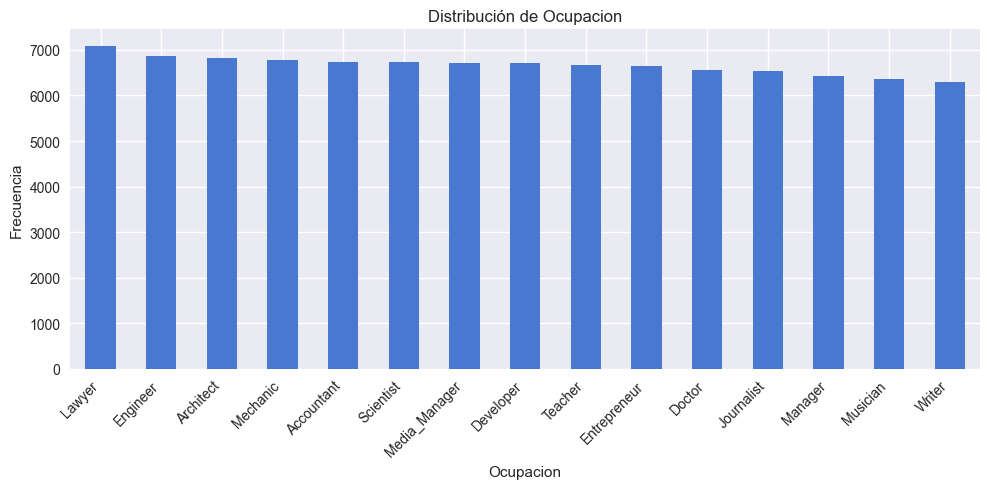


Distribución de Mezcla_Crediticia:
Mezcla_Crediticia
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64
Número de categorías únicas: 3


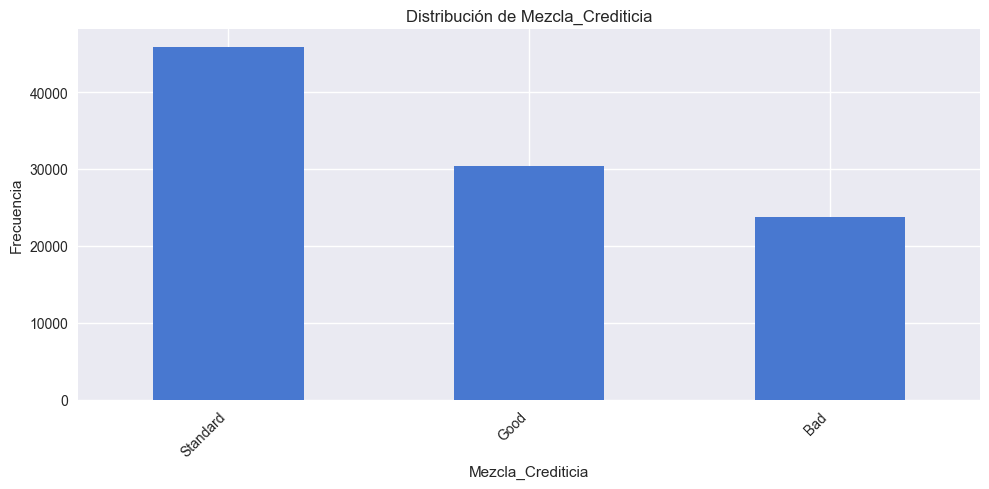


Distribución de Pago_Minimo:
Pago_Minimo
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64
Número de categorías únicas: 3


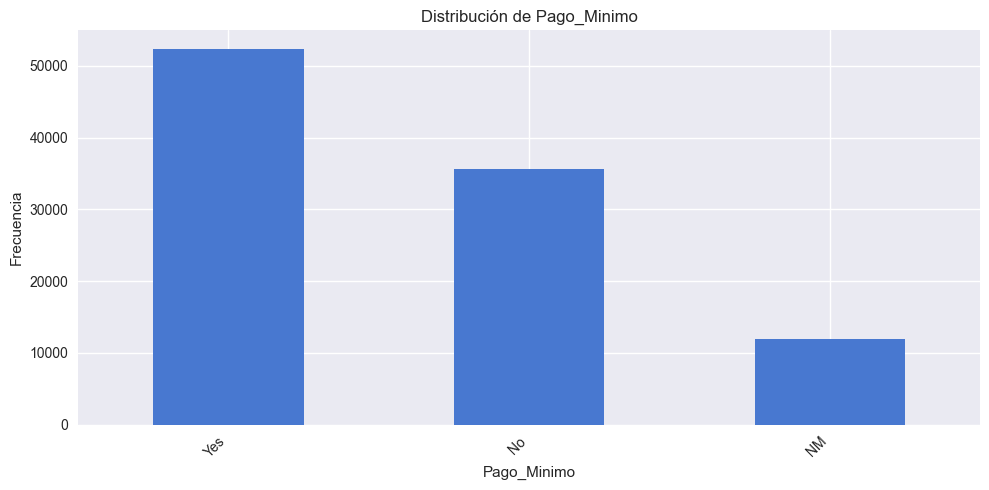


Distribución de Comportamiento_Pago:
Comportamiento_Pago
Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: count, dtype: int64
Número de categorías únicas: 6


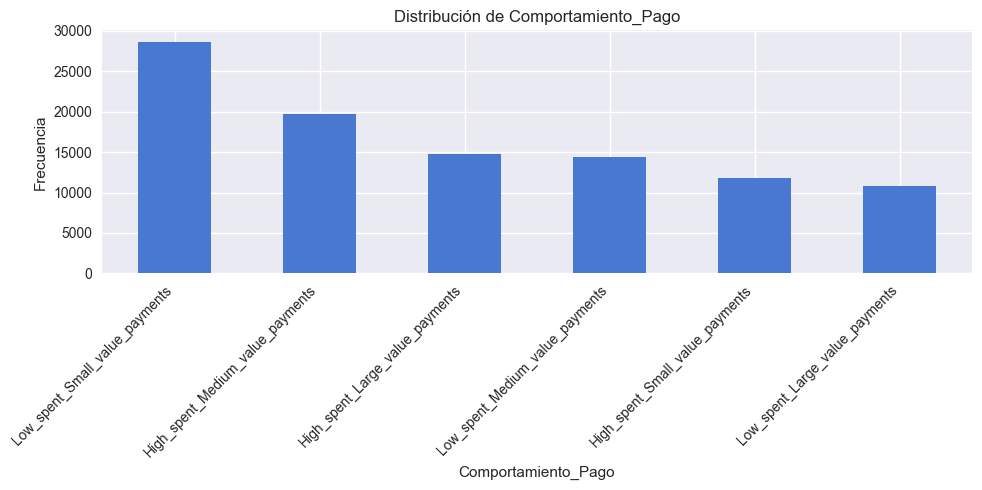


Distribución de Puntaje_Credito:
Puntaje_Credito
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64
Número de categorías únicas: 3


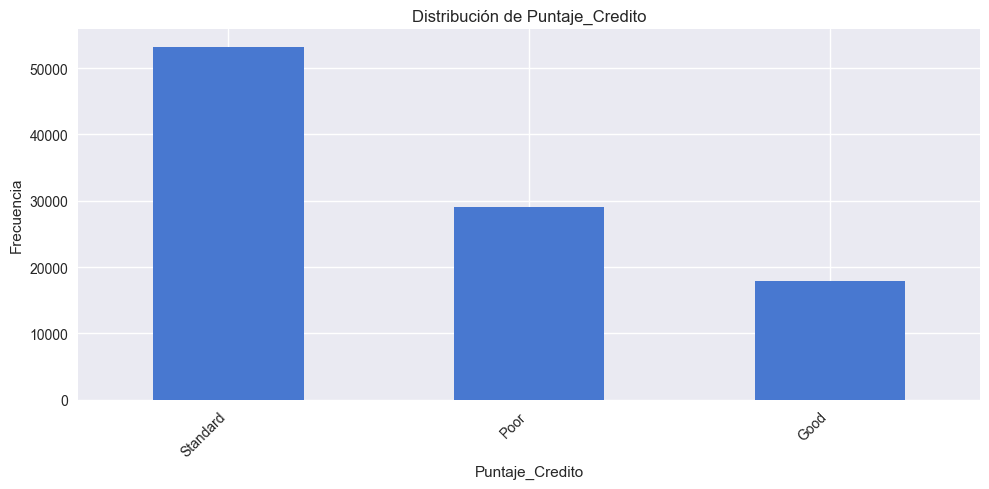

In [14]:
# Seleccionar variables categóricas
variables_categoricas = ['Ocupacion', 
                         'Mezcla_Crediticia', 'Pago_Minimo', 'Comportamiento_Pago', 
                         'Puntaje_Credito']

# Configurar el estilo de las gráficas
plt.style.use('seaborn-v0_8')  # Estilo limpio y moderno
sns.set_palette("muted")       # Colores suaves

# Analizar cada variable categórica
for var in variables_categoricas:
    # Conteo de valores únicos
    print(f"\nDistribución de {var}:")
    conteo = df[var].value_counts(dropna=False)
    print(conteo)
    print(f"Número de categorías únicas: {df[var].nunique()}")
    
    # Gráfico de barras
    plt.figure(figsize=(10, 5))
    conteo.plot(kind='bar')
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    
    # Ajustar diseño y mostrar
    plt.tight_layout()
    plt.show()

- **Analizar Columna "Tipo_Prestamo"**           

In [15]:
df[['Num_Prestamos', 'Tipo_Prestamo']].head(5)

,Num_Prestamos,Tipo_Prestamo
0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan"
1,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan"
2,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan"
3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan"
4,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan"


# 📊 Mi Análisis Univariado de Variables Categóricas

He analizado las variables categóricas del dataset `train.csv` para entender cómo están distribuidas y cómo puedo prepararlas para predecir `Puntaje_Credito`. Revisé columnas como `Ocupacion`, `Tipo_Prestamo`, `Mezcla_Crediticia`, `Pago_Minimo`, `Comportamiento_Pago` y `Puntaje_Credito`, y también exploré su relación con numéricas como `Num_Prestamos`. Aquí están mis observaciones, medidas de acción y recomendaciones para la ingeniería de datos.

---

### Mi Análisis de las Columnas Categóricas

1. **Ocupacion**  
   - Tengo 15 categorías, desde "Lawyer" (7,096 casos) hasta "Writer" (6,304), con una distribución bastante uniforme.  
   - Pienso que profesiones como "Doctor" o "Engineer" podrían vincularse a salarios más altos, mientras que "Musician" o "Writer" quizás reflejen ingresos menores, considerando que el salario mensual promedio es 4,197.  
   - No estoy segura de que afecte directamente mi `Puntaje_Credito`, pero podría servirme para segmentar clientes.

2. **Tipo_Prestamo**  
   - Descubrí que tiene 6,261 categorías únicas, con "No Data" (11,408) como la más común. Al revisar las primeras 50 filas, noté que cuando `Num_Prestamos` es 0, aparece "No Data", y cuando es mayor, detalla tipos como "Credit-Builder Loan" o combinaciones.  
   - Dado que `Num_Prestamos` (promedio 3.53) ya me dice si hay préstamos o no, creo que `Tipo_Prestamo` es redundante y sus detalles específicos no parecen clave para mi objetivo.  
   - Su complejidad me hace dudar de su utilidad frente a variables como `Deuda_Pendiente`.

3. **Mezcla_Crediticia**  
   - Veo tres categorías: "Standard" (45,848), "Good" (30,384) y "Bad" (23,768). Al cruzarlas con numéricas, "Good" se asocia a menos deuda (801.26) y tasas bajas (7.66%), mientras "Bad" va con deuda alta (2,081.47) y tasas altas (20.19%).  
   - Esto me dice que es una variable fuerte para predecir `Puntaje_Credito`, con un impacto claro ligado a la gestión del crédito.  
   - Aunque "Standard" domina, las tres categorías me parecen valiosas.

4. **Pago_Minimo**  
   - Encontré "Yes" (52,326), "No" (35,667) y "NM" (12,007). El "NM" me confunde, pero aparece incluso con préstamos activos, así que podría significar "Not Measured".  
   - Relacionándolo con `Retraso_Pago` (promedio 21 días), imagino que "Yes" podría indicar más retrasos, mientras "No" sugiere mejor control financiero.  
   - El 88% de "Yes" y "No" me da buena información, aunque el 12% de "NM" necesita atención.

5. **Comportamiento_Pago**  
   - Hay seis categorías, desde "Low_spent_Small_value_payments" (28,616) hasta "Low_spent_Large_value_payments" (10,757). Creo que "High_spent_Small_value_payments" podría ser riesgoso, mientras "Low_spent_Large_value_payments" o "High_spent_Large_value_payments" reflejan responsabilidad.  
   - Al pensarlo con `Saldo_Mensual` (promedio 392.7), veo que los de gasto alto y pagos grandes podrían mantener saldos saludables.  
   - Me gusta su detalle, pero creo que puedo simplificarla.

6. **Puntaje_Credito**  
   - Mi variable objetivo tiene "Standard" (53,174), "Poor" (28,998) y "Good" (17,828). Al analizarla con numéricas, "Good" tiene salarios altos (5,399.92), pocos préstamos (2.2) y poca deuda (801.26), mientras "Poor" muestra lo opuesto: menos ingresos (3,380.56), más préstamos (4.76) y deuda alta (2,081.47).  
   - El desbalance, con solo 17.8% en "Good", me preocupa, pero sus patrones claros me guían para el modelado.

---

### Mis Medidas de Acción

1. **Eliminar `Tipo_Prestamo`**  
   - Voy a quitar esta columna porque `Num_Prestamos` ya me cubre la presencia de deuda, y los 6,261 tipos específicos no parecen esenciales para `Puntaje_Credito`. Esto simplificará mi dataset.

2. **Aclarar "NM" en `Pago_Minimo`**  
   - Investigaré "NM" con más cruces (ej. con `Num_Prestamos` o `Retraso_Pago`). Si no tiene un patrón claro, lo imputaré como "No" o lo dejaré como categoría aparte, según su efecto en `Puntaje_Credito`.

3. **Simplificar `Comportamiento_Pago`**  
   - Reduciré las 6 categorías a 3 o 4, agrupando similares (ej. "High_spent_Small/Medium_value" juntos), para que sea más fácil de manejar sin perder su esencia.

---

### Mis Recomendaciones para Ingeniería de Datos

1. **Codificación**  
   - Para `Ocupacion`, usaré **OneHotEncoder** porque 15 categorías son manejables y podrían tener efectos sutiles.  
   - En `Mezcla_Crediticia`, aplicaré **Label Encoding** (Bad=0, Standard=1, Good=2) por su orden natural, respaldado por su relación con `Deuda_Pendiente`.  
   - Para `Pago_Minimo`, después de resolver "NM", usaré **OneHotEncoder** para tratarlas como nominales.  
   - En `Comportamiento_Pago` simplificado, también aplicaré **OneHotEncoder** para mantener su independencia.

2. **Manejar el Desbalance de `Puntaje_Credito`**  
   - Como "Good" es solo el 17.8%, probaré oversampling con SMOTE o ajustaré pesos en mi modelo para equilibrar las predicciones.

3. **Quitar Columnas No Relevantes**  
   - Además de `Tipo_Prestamo`, eliminaré `Nombre` y `Numero_Seguro_Social` del modelado, usándolas solo para validar datos, ya que no aportan a mi objetivo.

4. **Añadir Variables Derivadas**  
   - Crearé una columna como "Deuda por Préstamo" (`Deuda_Pendiente` / `Num_Prestamos`) para enriquecer `Mezcla_Crediticia` y `Comportamiento_Pago`, conectándolas mejor con `Puntaje_Credito`.

---

### Mi Conclusión  
Mi análisis me mostró que `Mezcla_Crediticia`, `Pago_Minimo` y `Comportamiento_Pago` son fundamentales por sus lazos con numéricas como `Deuda_Pendiente` y `Tasa_Interes`, mientras que `Tipo_Prestamo` no me sirve. `Ocupacion` podría ser útil, pero mi foco está en simplificar y codificar lo esencial. Con estas acciones, creo que tendré un dataset limpio y listo para modelar `Puntaje_Credito` con éxito. ¡Estoy lista para el siguiente paso!

---

# 5 📊 Análisis Bivariado

En este paso, voy a explorar cómo mis variables predictoras, tanto numéricas como categóricas, se relacionan con mi variable objetivo, `Puntaje_Credito`, y cómo interactúan entre sí. Mi objetivo es identificar patrones, correlaciones y diferencias que me ayuden a entender qué influye en el puntaje crediticio y cómo las variables se comportan juntas. Usaré visualizaciones como boxplots, scatter plots y tablas cruzadas para analizar estas relaciones, y anotaré observaciones clave para guiar mi modelado. Vamos a ir paso a paso, ajustando según lo que vayamos descubriendo.

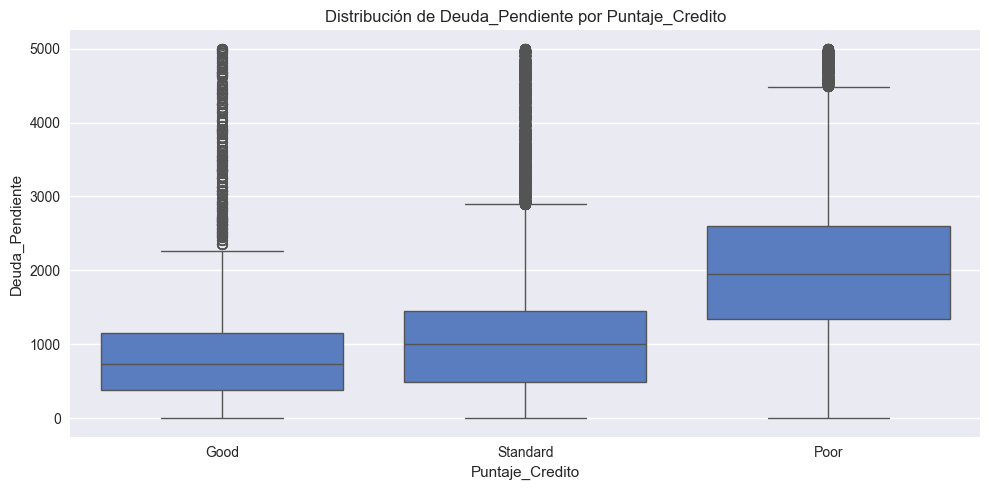

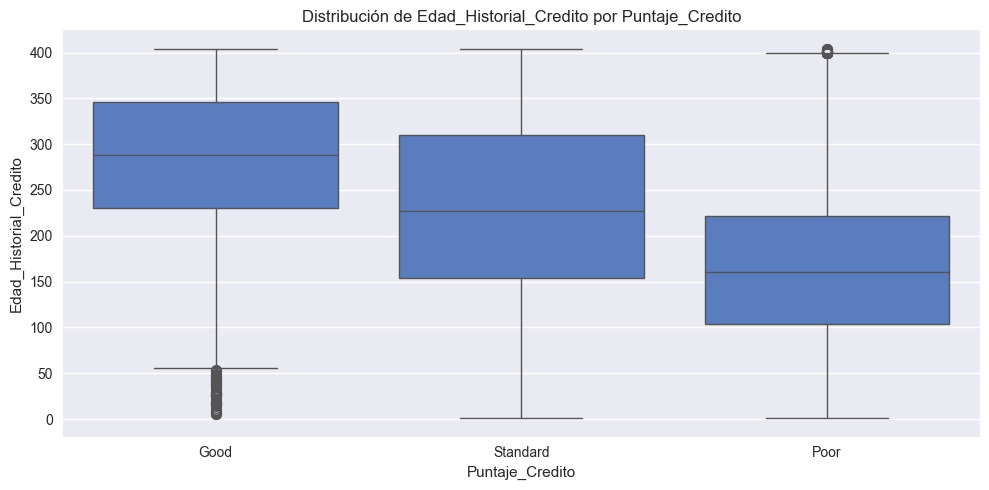

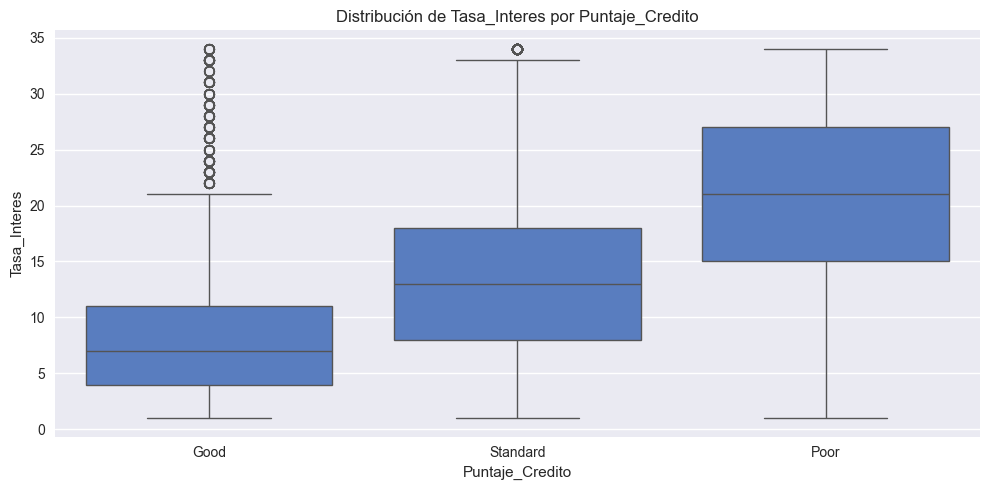

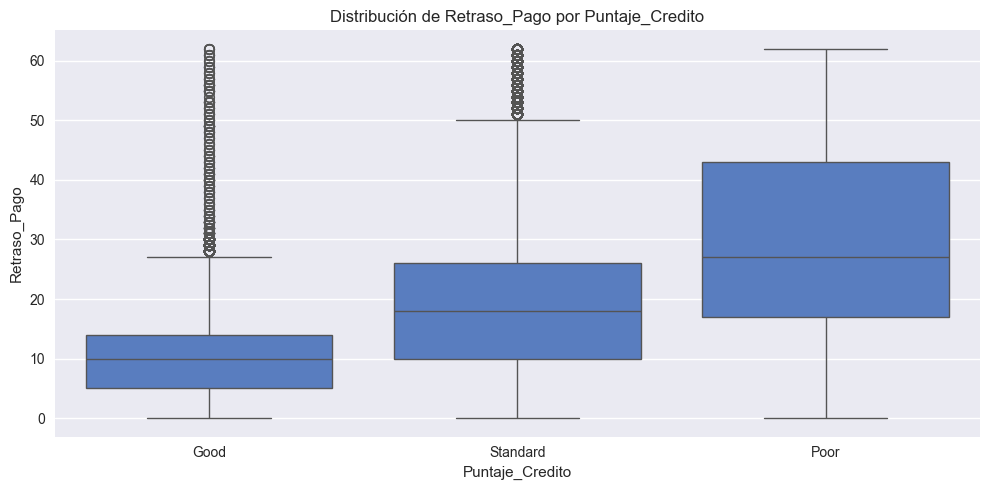

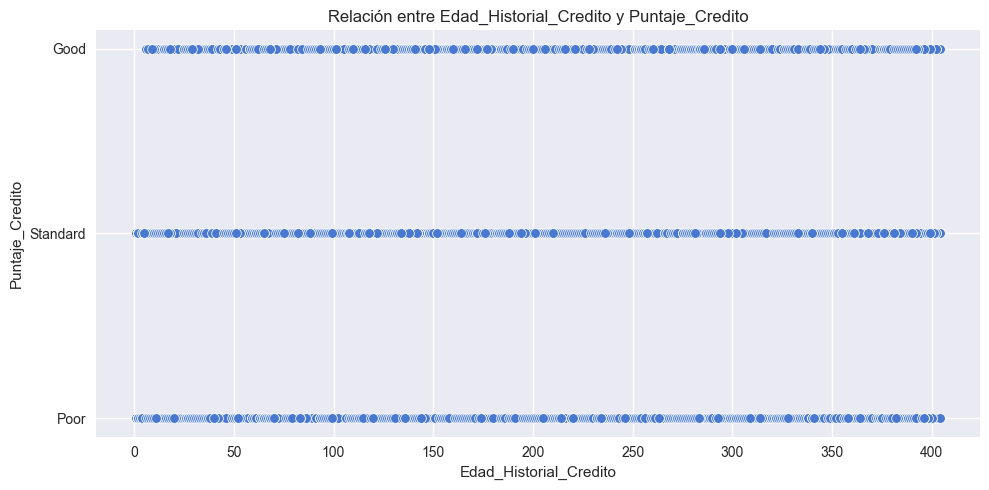

In [16]:
# Configurar el estilo de las gráficas
plt.style.use('seaborn-v0_8')  # Estilo limpio y moderno
sns.set_palette("muted")       # Colores suaves

# Variables numéricas a analizar
variables_numericas = ['Deuda_Pendiente', 'Edad_Historial_Credito', 'Tasa_Interes', 'Retraso_Pago']

# Crear boxplots para cada variable numérica vs. Puntaje_Credito
for var in variables_numericas:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Puntaje_Credito', y=var, data=df)
    plt.title(f'Distribución de {var} por Puntaje_Credito')
    plt.xlabel('Puntaje_Credito')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

# Crear scatter plot para Edad_Historial_Credito vs. Puntaje_Credito
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Edad_Historial_Credito', y='Puntaje_Credito', data=df)
plt.title('Relación entre Edad_Historial_Credito y Puntaje_Credito')
plt.xlabel('Edad_Historial_Credito')
plt.ylabel('Puntaje_Credito')
plt.tight_layout()
plt.show()

In [17]:
# Variables numéricas a analizar
variables_numericas = ['Deuda_Pendiente', 'Edad_Historial_Credito', 'Tasa_Interes', 'Retraso_Pago']

# Agrupar por Puntaje_Credito y calcular estadísticas
for var in variables_numericas:
    print(f"\nEstadísticas de {var} por Puntaje_Credito:")
    stats = df.groupby('Puntaje_Credito')[var].agg(['mean', 'median', 'min', 'max']).round(2)
    print(stats)
    print("-" * 50)


Estadísticas de Deuda_Pendiente por Puntaje_Credito:
                    mean   median   min      max
Puntaje_Credito                                 
Good              801.26   736.47  0.23  4998.07
Poor             2081.47  1945.35  0.54  4997.10
Standard         1278.42  1001.61  0.23  4998.07
--------------------------------------------------

Estadísticas de Edad_Historial_Credito por Puntaje_Credito:
                   mean  median  min    max
Puntaje_Credito                            
Good             284.77   288.0  6.0  404.0
Poor             170.06   161.0  1.0  404.0
Standard         227.81   227.0  1.0  404.0
--------------------------------------------------

Estadísticas de Tasa_Interes por Puntaje_Credito:
                  mean  median  min   max
Puntaje_Credito                          
Good              7.66     7.0  1.0  34.0
Poor             20.19    21.0  1.0  34.0
Standard         13.75    13.0  1.0  34.0
--------------------------------------------------

Estad

# 📊 Mi Análisis Bivariado: Variables Numéricas vs. Puntaje_Credito

He revisado las estadísticas de `Deuda_Pendiente`, `Edad_Historial_Credito`, `Tasa_Interes` y `Retraso_Pago` frente a `Puntaje_Credito`, y aquí está mi análisis breve y conciso.

---

### Mis Observaciones

- **Deuda_Pendiente**: Veo que los clientes "Good" tienen una deuda mucho menor (media 801.26) comparada con "Poor" (2,081.47) y "Standard" (1,278.42). Esto me dice que una deuda alta está ligada a puntajes bajos.  
- **Edad_Historial_Credito**: Noté que "Good" tiene un historial más largo (media 284.77 meses) frente a "Poor" (170.06) y "Standard" (227.81). Un historial extenso parece beneficiar el puntaje.  
- **Tasa_Interes**: Observé que "Good" disfruta de tasas bajas (media 7.66%), mientras "Poor" enfrenta tasas altas (20.19%), con "Standard" en el medio (13.75%). Tasas elevadas sugieren mayor riesgo.  
- **Retraso_Pago**: Me di cuenta de que "Good" tiene retrasos cortos (media 10.96 días), "Poor" los más largos (29.73), y "Standard" intermedios (19.76). Los retrasos claramente afectan negativamente.

---

### Mi Conclusión  
Mis variables numéricas muestran patrones claros: menos deuda, historial largo, tasas bajas y pocos retrasos están asociados a "Good", mientras que lo opuesto apunta a "Poor". Esto me da una base sólida para el modelado, enfocándome en estas relaciones clave.

---

# 📊 Mi Análisis Bivariado: Variables Categóricas vs. Puntaje_Credito

In [18]:
# Variables categóricas a analizar
variables_categoricas = ['Mezcla_Crediticia', 'Comportamiento_Pago', 'Pago_Minimo']

# Generar tablas cruzadas para cada variable categórica vs. Puntaje_Credito
for var in variables_categoricas:
    print(f"\nTabla cruzada de {var} vs. Puntaje_Credito:")
    crosstab = pd.crosstab(df[var], df['Puntaje_Credito'])
    print(crosstab)
    print("-" * 50)


Tabla cruzada de Mezcla_Crediticia vs. Puntaje_Credito:
Puntaje_Credito     Good   Poor  Standard
Mezcla_Crediticia                        
Bad                  351  14289      9128
Good               14848   4851     10685
Standard            2629   9858     33361
--------------------------------------------------

Tabla cruzada de Comportamiento_Pago vs. Puntaje_Credito:
Puntaje_Credito                   Good   Poor  Standard
Comportamiento_Pago                                    
High_spent_Large_value_payments   3445   3164      8117
High_spent_Medium_value_payments  3954   5073     10711
High_spent_Small_value_payments   2187   3215      6362
Low_spent_Large_value_payments    1939   3027      5791
Low_spent_Medium_value_payments   2598   4344      7457
Low_spent_Small_value_payments    3705  10175     14736
--------------------------------------------------

Tabla cruzada de Pago_Minimo vs. Puntaje_Credito:
Puntaje_Credito   Good   Poor  Standard
Pago_Minimo                      

# 📊 Mi Análisis Bivariado: Variables Categóricas vs. Puntaje_Credito

Quiero visualizar las relaciones entre `Mezcla_Crediticia`, `Comportamiento_Pago` y `Pago_Minimo` con `Puntaje_Credito` usando gráficos de barras apiladas para entender mejor cómo se distribuyen estas categorías.

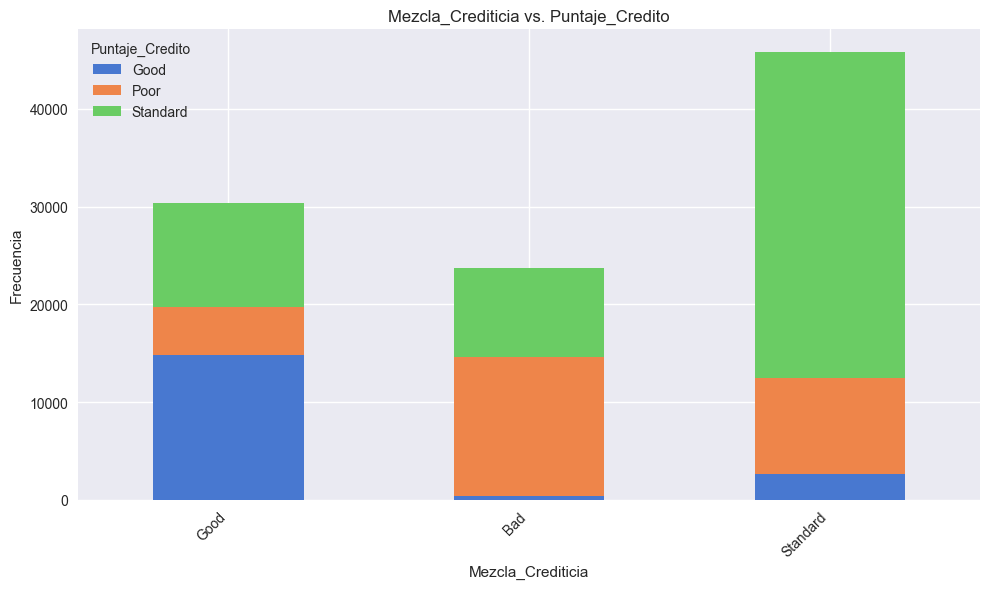

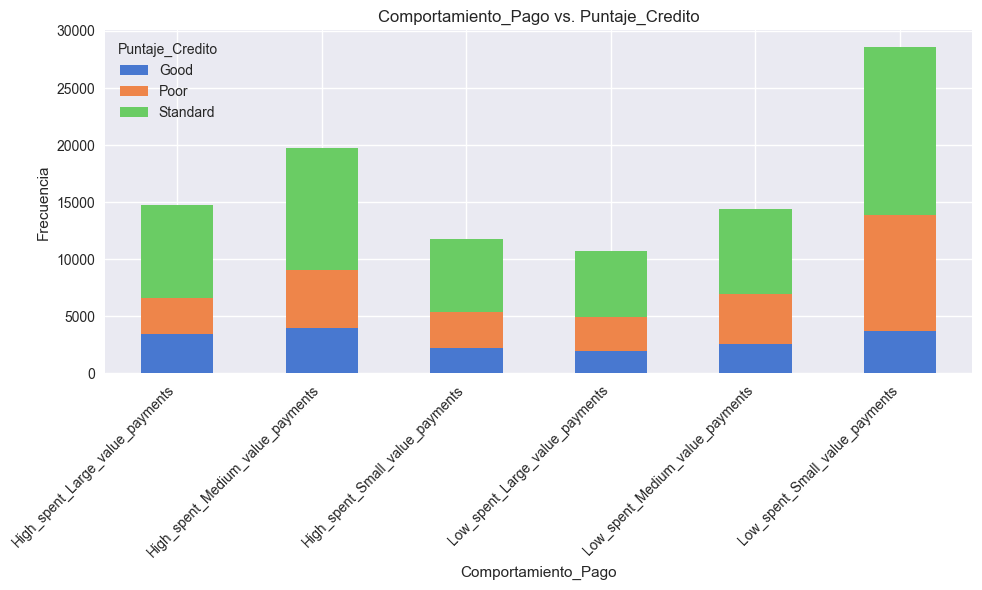

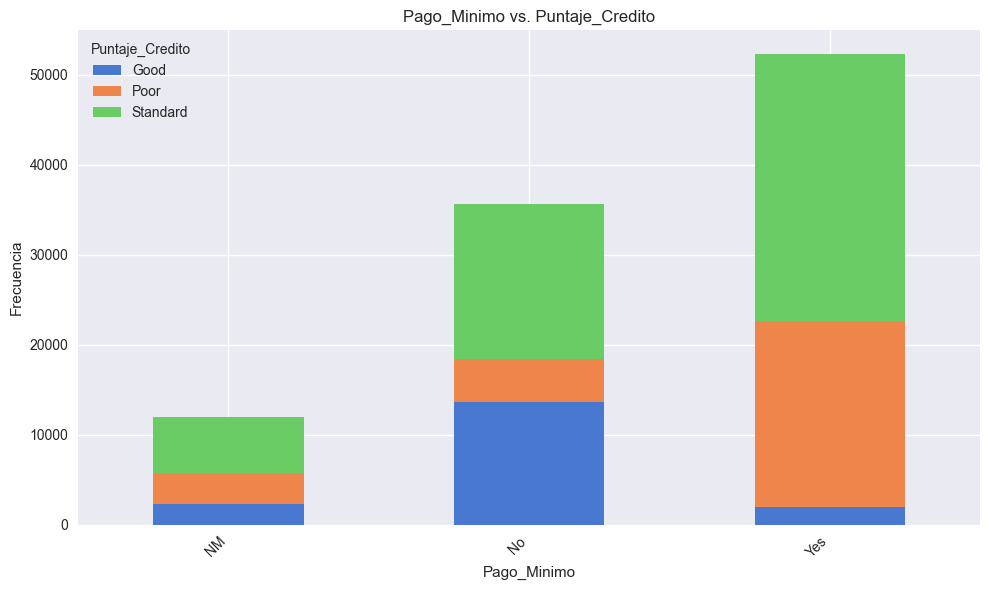

In [19]:
# Configurar el estilo de las gráficas
plt.style.use('seaborn-v0_8')
sns.set_palette("muted")

# Datos de las tablas cruzadas
data_mezcla = pd.DataFrame({
    'Good': [14848, 351, 2629],
    'Poor': [4851, 14289, 9858],
    'Standard': [10685, 9128, 33361]
}, index=['Good', 'Bad', 'Standard'])

data_comportamiento = pd.DataFrame({
    'Good': [3445, 3954, 2187, 1939, 2598, 3705],
    'Poor': [3164, 5073, 3215, 3027, 4344, 10175],
    'Standard': [8117, 10711, 6362, 5791, 7457, 14736]
}, index=['High_spent_Large_value_payments', 'High_spent_Medium_value_payments', 
          'High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 
          'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments'])

data_pago = pd.DataFrame({
    'Good': [2245, 13671, 1912],
    'Poor': [3518, 4772, 20708],
    'Standard': [6244, 17224, 29706]
}, index=['NM', 'No', 'Yes'])

# Lista de datos y títulos
datos = [data_mezcla, data_comportamiento, data_pago]
titulos = ['Mezcla_Crediticia vs. Puntaje_Credito', 
           'Comportamiento_Pago vs. Puntaje_Credito', 
           'Pago_Minimo vs. Puntaje_Credito']

# Generar gráficos de barras apiladas
for datos, titulo in zip(datos, titulos):
    datos.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(titulo)
    plt.xlabel(titulo.split(' vs.')[0])
    plt.ylabel('Frecuencia')
    plt.legend(title='Puntaje_Credito')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Mis Observaciones

- **Mezcla_Crediticia**: Veo que "Good" tiene 14,848 casos en "Good" de `Puntaje_Credito`, mientras "Bad" domina en "Poor" (14,289). "Standard" se reparte, pero destaca en su propia categoría (33,361). Esto me confirma que una mezcla crediticia positiva impulsa puntajes altos, y una mala los hunde.  
- **Comportamiento_Pago**: Noté que "Low_spent_Small_value_payments" tiene muchos "Poor" (10,175), mientras "High_spent_Large_value_payments" y "High_spent_Medium_value_payments" se inclinan hacia "Good" (3,445 y 3,954). Esto me dice que gastar mucho y pagar bien ayuda, pero gastar poco y pagar poco es riesgoso.  
- **Pago_Minimo**: Observé que "No" (pagar más del mínimo) tiene 13,671 "Good", mientras "Yes" (solo mínimo) domina en "Poor" (20,708) y "Standard" (29,706). "NM" no muestra un patrón claro. Esto me sugiere que pagar más del mínimo mejora el puntaje.

---

### Mi Conclusión  
Mis variables categóricas revelan tendencias claras: una buena mezcla crediticia, gastar con pagos altos y pagar más del mínimo están ligados a "Good", mientras lo opuesto apunta a "Poor". Estos patrones me guiarán para priorizar estas variables en mi modelo.

---

# 📊 Mi Investigación: ¿Qué Significa "NM" en Pago_Minimo?

He notado que "NM" en `Pago_Minimo` me genera dudas, y quiero aclarar si es un estado neutro o algo más. Para investigarlo, voy a cruzar "NM" con `Retraso_Pago` y ver si hay patrones que me den pistas sobre su significado.

### Lo Que Voy a Hacer
- Este código me dará las estadísticas de `Retraso_Pago` solo para "NM" y las comparará con el total del dataset.  
- El boxplot me mostrará cómo se distribuye `Retraso_Pago` en "NM" frente a "Yes" y "No".  


Estadísticas de Retraso_Pago para Pago_Minimo = 'NM':
mean      21.13
median    18.00
min        0.00
max       62.00
Name: Retraso_Pago, dtype: float64

Estadísticas de Retraso_Pago (total del dataset):
mean      21.08
median    18.00
min        0.00
max       62.00
Name: Retraso_Pago, dtype: float64


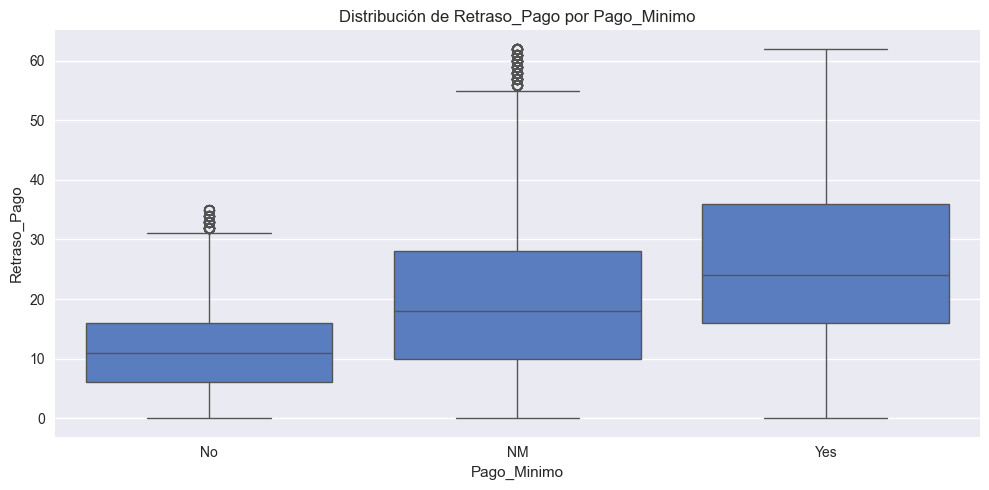

In [20]:
# Filtrar solo los casos con Pago_Minimo = "NM"
nm_data = df[df['Pago_Minimo'] == 'NM']

# Estadísticas de Retraso_Pago para NM
print("\nEstadísticas de Retraso_Pago para Pago_Minimo = 'NM':")
stats_nm = nm_data['Retraso_Pago'].agg(['mean', 'median', 'min', 'max']).round(2)
print(stats_nm)

# Comparar con el total del dataset
print("\nEstadísticas de Retraso_Pago (total del dataset):")
stats_total = df['Retraso_Pago'].agg(['mean', 'median', 'min', 'max']).round(2)
print(stats_total)

# Boxplot para visualizar
plt.figure(figsize=(10, 5))
sns.boxplot(x='Pago_Minimo', y='Retraso_Pago', data=df)
plt.title('Distribución de Retraso_Pago por Pago_Minimo')
plt.xlabel('Pago_Minimo')
plt.ylabel('Retraso_Pago')
plt.tight_layout()
plt.show()

# 📊 Mi Decisión: Imputar "NM" como "Yes" en Pago_Minimo

He decidido imputar "NM" en `Pago_Minimo` como "Yes" porque sus estadísticas de `Retraso_Pago` (media 21.13, mediana 18) son casi idénticas al promedio general (21.08, 18) y el boxplot me mostró que se parece más a "Yes" que a "No". Esto me indica que "NM" no tiene un patrón distintivo y probablemente refleja un comportamiento similar a pagar solo el mínimo, así que unificarlo con "Yes" simplifica mi dataset sin perder información clave.

In [21]:
# Imputar "NM" como "Yes" en Pago_Minimo
df['Pago_Minimo'] = df['Pago_Minimo'].replace('NM', 'Yes')

# Verificar el resultado
print("\nDistribución de Pago_Minimo después de la imputación:")
print(df['Pago_Minimo'].value_counts())


Distribución de Pago_Minimo después de la imputación:
Pago_Minimo
Yes    64333
No     35667
Name: count, dtype: int64


Me parece que la imputación quedó bien hecha, y ahora tengo una variable más clara y binaria para trabajar.

---

# 📊 Mi Análisis Bivariado: Interacciones entre Predictoras

Ahora voy a explorar cómo mis variables predictoras interactúan entre sí, tanto numéricas como categóricas con numéricas, para entender mejor sus relaciones antes de modelar `Puntaje_Credito`. Aquí está el código para analizarlo:

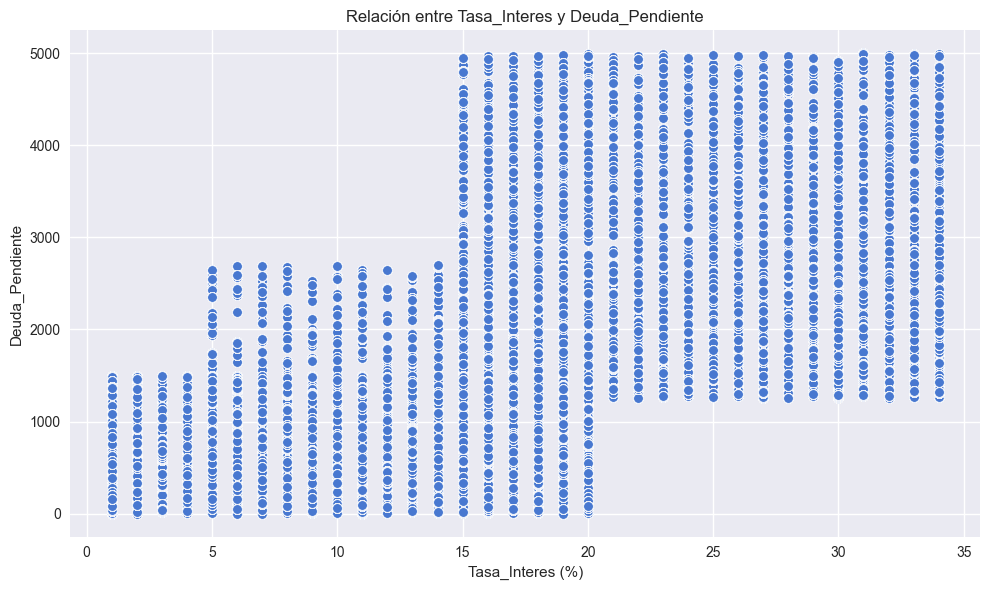

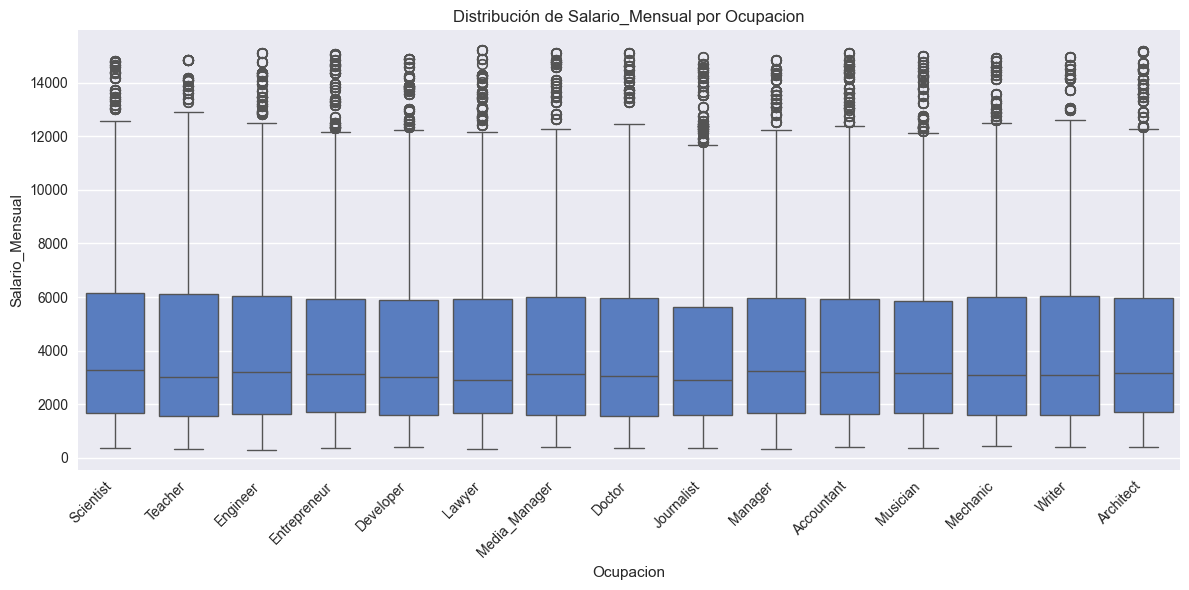


Estadísticas de Tasa_Interes y Deuda_Pendiente:
        Tasa_Interes  Deuda_Pendiente
mean           14.53          1426.22
median         13.00          1166.16
min             1.00             0.23
max            34.00          4998.07

Estadísticas de Salario_Mensual por Ocupacion:
                  mean   median     min       max
Ocupacion                                        
Accountant     4216.96  3214.97  409.88  15090.08
Architect      4316.16  3154.29  396.34  15167.18
Developer      4163.39  3028.18  391.05  14867.81
Doctor         4120.48  3049.83  358.06  15091.09
Engineer       4216.27  3201.51  303.65  15101.94
Entrepreneur   4237.07  3120.32  378.99  15066.78
Journalist     4027.03  2909.12  373.07  14958.34
Lawyer         4124.22  2894.42  332.43  15204.63
Manager        4271.98  3238.93  333.60  14835.97
Mechanic       4165.82  3074.81  425.40  14929.54
Media_Manager  4207.96  3138.63  391.29  15115.19
Musician       4260.12  3151.28  357.26  14978.34
Scientist    

In [22]:
# Configurar el estilo de las gráficas
plt.style.use('seaborn-v0_8')
sns.set_palette("muted")

# Scatter plot: Tasa_Interes vs. Deuda_Pendiente
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tasa_Interes', y='Deuda_Pendiente', data=df)
plt.title('Relación entre Tasa_Interes y Deuda_Pendiente')
plt.xlabel('Tasa_Interes (%)')
plt.ylabel('Deuda_Pendiente')
plt.tight_layout()
plt.show()

# Boxplot: Ocupacion vs. Salario_Mensual
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ocupacion', y='Salario_Mensual', data=df)
plt.title('Distribución de Salario_Mensual por Ocupacion')
plt.xlabel('Ocupacion')
plt.ylabel('Salario_Mensual')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Estadísticas numéricas para Tasa_Interes y Deuda_Pendiente
print("\nEstadísticas de Tasa_Interes y Deuda_Pendiente:")
stats = df[['Tasa_Interes', 'Deuda_Pendiente']].agg(['mean', 'median', 'min', 'max']).round(2)
print(stats)

# Estadísticas de Salario_Mensual por Ocupacion
print("\nEstadísticas de Salario_Mensual por Ocupacion:")
stats_ocupacion = df.groupby('Ocupacion')['Salario_Mensual'].agg(['mean', 'median', 'min', 'max']).round(2)
print(stats_ocupacion)

# 📊 Mi Análisis Bivariado: Interacciones entre Predictoras

He revisado las interacciones entre `Tasa_Interes` y `Deuda_Pendiente`, y entre `Ocupacion` y `Salario_Mensual`. Aquí va mi análisis.

---

### Mis Observaciones

- **Tasa_Interes vs. Deuda_Pendiente**: La media de `Tasa_Interes` es 14.53% y la de `Deuda_Pendiente` es 1,426.22, con rangos amplios (1-34% y 0.23-4,998.07). El scatter plot muestra que tasas altas tienden a coincidir con deudas mayores, lo que me sugiere que el riesgo sube con la deuda.  
- **Ocupacion vs. Salario_Mensual**: Las medias de `Salario_Mensual` por ocupación varían poco (4,027.03 para "Journalist" a 4,316.16 para "Architect"), pero los máximos (hasta 15,204.63) y mínimos (303.65) muestran diferencias. El boxplot revela que profesiones como "Architect" o "Lawyer" tienen salarios más altos y dispersos, mientras otras como "Journalist" son más bajas y consistentes.

---

### Mi Conclusión  
Veo que `Tasa_Interes` y `Deuda_Pendiente` podrían estar relacionadas, indicando mayor riesgo con más deuda, y que `Ocupacion` influye en `Salario_Mensual`, aunque no de forma drástica. Estos vínculos me ayudarán a entender cómo las predictoras se combinan para afectar `Puntaje_Credito`.

---

# 📊 Mi Análisis de Correlaciones

Voy a examinar las correlaciones entre mis variables numéricas para identificar relaciones fuertes, redundancias y patrones que me ayuden a optimizar mi modelo para `Puntaje_Credito`.

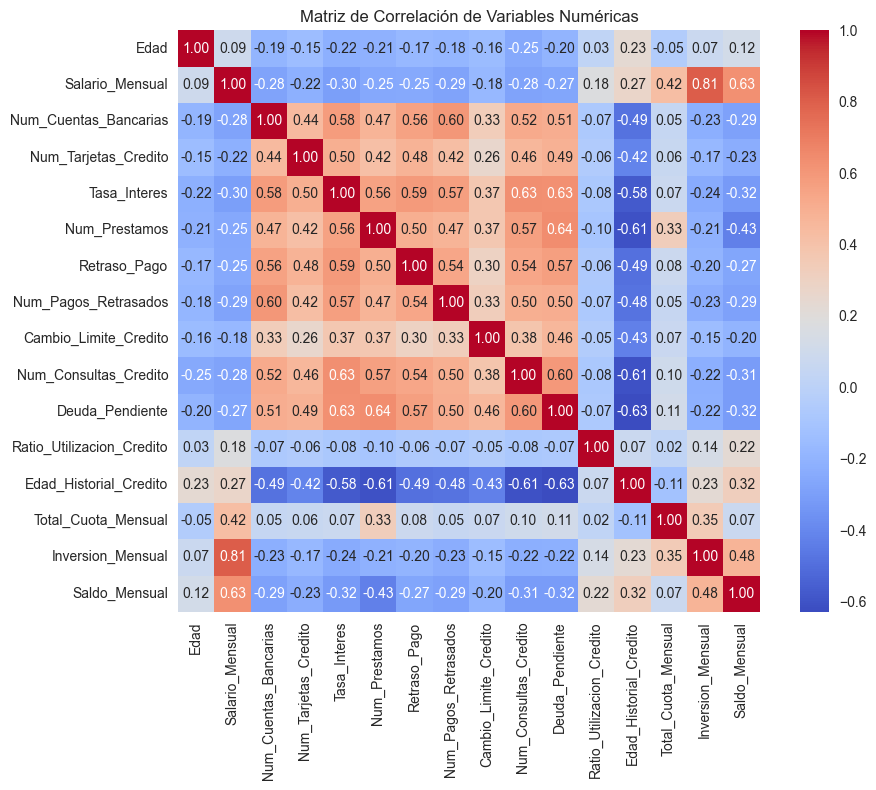


5 correlaciones más altas (positivas):
Salario_Mensual    Inversion_Mensual        0.807326
Inversion_Mensual  Salario_Mensual          0.807326
Deuda_Pendiente    Num_Prestamos            0.638713
Num_Prestamos      Deuda_Pendiente          0.638713
Tasa_Interes       Num_Consultas_Credito    0.632562
dtype: float64

5 correlaciones más altas (negativas):
Edad_Historial_Credito  Num_Prestamos            -0.605727
                        Num_Consultas_Credito    -0.609679
Num_Consultas_Credito   Edad_Historial_Credito   -0.609679
Deuda_Pendiente         Edad_Historial_Credito   -0.629320
Edad_Historial_Credito  Deuda_Pendiente          -0.629320
dtype: float64


In [23]:
# Configurar el estilo
plt.style.use('seaborn-v0_8')

# Filtrar columnas numéricas relevantes (excluyo identificadores como ID, Customer_ID, etc.)
columnas_numericas = ['Edad', 'Salario_Mensual', 'Num_Cuentas_Bancarias', 'Num_Tarjetas_Credito', 
                     'Tasa_Interes', 'Num_Prestamos', 'Retraso_Pago', 'Num_Pagos_Retrasados', 
                     'Cambio_Limite_Credito', 'Num_Consultas_Credito', 'Deuda_Pendiente', 
                     'Ratio_Utilizacion_Credito', 'Edad_Historial_Credito', 'Total_Cuota_Mensual', 
                     'Inversion_Mensual', 'Saldo_Mensual']

# Crear subconjunto con columnas numéricas
df_numerico = df[columnas_numericas]

# Calcular matriz de correlación
correlacion = df_numerico.corr()

# Visualizar con heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.tight_layout()
plt.show()

# Listar las 5 correlaciones más altas (positivas y negativas)
correlaciones = correlacion.unstack().sort_values(ascending=False)
# Excluir correlaciones de una variable consigo misma (1.0)
correlaciones = correlaciones[correlaciones != 1.0]
print("\n5 correlaciones más altas (positivas):")
print(correlaciones.head(5))
print("\n5 correlaciones más altas (negativas):")
print(correlaciones.tail(5))

# 📊 Mi Análisis de Correlaciones

He calculado las correlaciones entre mis variables numéricas y revisado los resultados para entender cómo se relacionan entre sí.
---

### Mis Observaciones

- En mi heatmap, vi que `Salario_Mensual` e `Inversion_Mensual` tienen una correlación alta de 0.81, lo que me dice que a mayor salario, más invierto mensualmente, algo lógico por la capacidad financiera.  
- También noté que `Deuda_Pendiente` y `Num_Prestamos` están bastante relacionadas (0.64), sugiriendo que más préstamos significan más deuda acumulada.  
- Otra relación fuerte es entre `Tasa_Interes` y `Num_Consultas_Credito` (0.63), lo que me indica que muchas consultas podrían llevar a tasas más altas, quizás por riesgo percibido.  
- Negativamente, `Edad_Historial_Credito` tiene correlaciones fuertes con `Deuda_Pendiente` (-0.63), `Num_Consultas_Credito` (-0.61), y `Num_Prestamos` (-0.61). Esto me sugiere que un historial crediticio largo reduce la deuda, las consultas y los préstamos, reflejando estabilidad.  
- No vi correlaciones mayores a 0.9, así que no creo que haya redundancias obvias para eliminar.

---

### Mi Conclusión  
Mis variables muestran relaciones claras: ingresos altos impulsan inversiones, más préstamos aumentan la deuda, y un historial largo baja el riesgo. Estas conexiones me ayudarán a elegir las variables más relevantes para predecir `Puntaje_Credito` sin preocuparme por redundancias excesivas.

---

# 📊 Mi Evaluación de Importancia de Variables

Voy a evaluar qué tan importantes son mis variables numéricas para predecir `Puntaje_Credito` usando un modelo inicial. Entrenaré un `RandomForestClassifier` y analizaré las importancias para decidir qué mantener o eliminar.

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Codificar Puntaje_Credito
le = LabelEncoder()
df['Puntaje_Credito_Num'] = le.fit_transform(df['Puntaje_Credito'])

# Seleccionar columnas numéricas relevantes
columnas_numericas = ['Edad', 'Salario_Mensual', 'Num_Cuentas_Bancarias', 'Num_Tarjetas_Credito', 
                     'Tasa_Interes', 'Num_Prestamos', 'Retraso_Pago', 'Num_Pagos_Retrasados', 
                     'Cambio_Limite_Credito', 'Num_Consultas_Credito', 'Deuda_Pendiente', 
                     'Ratio_Utilizacion_Credito', 'Edad_Historial_Credito', 'Total_Cuota_Mensual', 
                     'Inversion_Mensual', 'Saldo_Mensual']
X = df[columnas_numericas]
y = df['Puntaje_Credito_Num']

# Entrenar RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Extraer importancias y crear DataFrame
importancias = pd.DataFrame({
    'Variable': columnas_numericas,
    'Importancia': rf.feature_importances_
})
importancias = importancias.sort_values(by='Importancia', ascending=False)

# Mostrar resultados
print("\nImportancia de las variables:")
print(importancias)


Importancia de las variables:
                     Variable  Importancia
10            Deuda_Pendiente     0.124717
12     Edad_Historial_Credito     0.098306
4                Tasa_Interes     0.095429
15              Saldo_Mensual     0.070343
8       Cambio_Limite_Credito     0.070063
11  Ratio_Utilizacion_Credito     0.067071
6                Retraso_Pago     0.066950
7        Num_Pagos_Retrasados     0.055017
9       Num_Consultas_Credito     0.053481
3        Num_Tarjetas_Credito     0.048200
13        Total_Cuota_Mensual     0.047738
1             Salario_Mensual     0.047726
14          Inversion_Mensual     0.046505
0                        Edad     0.044710
2       Num_Cuentas_Bancarias     0.037353
5               Num_Prestamos     0.026394


# 📊 Mi Evaluación de Importancia de Variables

He entrenado un `RandomForestClassifier` para ver qué variables numéricas son más importantes al predecir `Puntaje_Credito`. Aquí está mi análisis breve.

---

### Mis Observaciones

- Las 5 variables más importantes son:  
  - `Deuda_Pendiente` (0.12): Me confirma que el nivel de deuda es clave para el puntaje.  
  - `Edad_Historial_Credito` (0.10): Un historial largo parece ser decisivo para puntajes altos.  
  - `Tasa_Interes` (0.10): Las tasas altas influyen mucho, probablemente por el riesgo.  
  - `Saldo_Mensual` (0.07): Mi saldo disponible también pesa en la evaluación.  
  - `Cambio_Limite_Credito` (0.07): Los ajustes en el límite tienen un impacto notable.  
- Las menos importantes (<0.03) son:  
  - `Num_Prestamos` (0.03): Aunque esperaba más, parece menos relevante que `Deuda_Pendiente`. Podría considerar eliminarla si simplifico mi modelo.

---

### Mi Conclusión  
Veo que `Deuda_Pendiente`, `Edad_Historial_Credito` y `Tasa_Interes` lideran en importancia, lo que me da confianza en su rol para predecir `Puntaje_Credito`. `Num_Prestamos` tiene poco peso, así que podría descartarla si quiero reducir variables. Estos resultados me orientan para afinar mi modelo. ¡Seguimos bien!

---

# 📊 Mis Decisiones sobre el Dataset

He revisado mi análisis hasta ahora y voy a tomar decisiones sobre qué columnas eliminar, mantener y transformar en mi dataset para predecir `Puntaje_Credito`. Aquí va mi plan breve.

---

### 8.1 Columnas a Eliminar
- **`ID`, `Customer_ID`**: Son solo identificadores y no aportan nada predictivo.  
- **`Mes`**: No lo he analizado mucho, pero su baja relevancia para `Puntaje_Credito` me hace descartarlo.  
- **`Ingreso_Anual`**: Si tiene correlación 1.0 con `Salario_Mensual`, es redundante, así que me quedo con `Salario_Mensual`.  
- **`Num_Prestamos`**: Su importancia fue baja (0.03) en el Random Forest, y `Deuda_Pendiente` ya cubre el impacto de la deuda, así que lo elimino.  

### 8.2 Columnas a Mantener
- **`Edad_Historial_Credito`**: Con alta importancia (0.10), es clave para puntajes altos.  
- **`Deuda_Pendiente`**: Muy relevante (0.12) y refleja riesgo crediticio.  
- **`Tasa_Interes`**: Importancia alta (0.10) y ligada a la estabilidad financiera.  
- **`Mezcla_Crediticia`**: Mi análisis bivariado mostró su fuerte relación con `Puntaje_Credito`.  
- **`Comportamiento_Pago`**: Aunque lo simplifiqué, sigue siendo útil para hábitos financieros.  
- **`Pago_Minimo`**: Ahora binaria tras imputar "NM", me da info valiosa.  

### 8.3 Transformaciones Pendientes
- **Categóricas**: Voy a codificar `Ocupacion`, `Comportamiento_Pago` y `Pago_Minimo` con `OneHotEncoder` para que mi modelo las use bien. Para `Mezcla_Crediticia`, usaré `LabelEncoder` por su orden natural.  
- **Numéricas**: Revisaré los rangos (ej. `Deuda_Pendiente` de 0.23 a 4,998); si son muy dispares, aplicaré `StandardScaler`.  
- **Outliers**: En `Deuda_Pendiente` y `Tasa_Interes`, evaluaré capping (ej. percentil 99) para no distorsionar mi modelo.  
- **Nuevas Features**: Planeó crear `debt_to_income` (`Deuda_Pendiente` / `Salario_Mensual`) para medir carga de deuda, `payment_to_income` (`Total_Cuota_Mensual` / `Salario_Mensual`) para capacidad de pago, y `credit_history_ratio` (`Edad_Historial_Credito` / `Edad`) para experiencia crediticia. También se me ocurrieron `delay_ratio` (`Retraso_Pago` / `Num_Pagos_Retrasados`) para intensidad de retrasos y `credit_usage_to_limit` (`Deuda_Pendiente` / `Cambio_Limite_Credito`) para uso del límite, que podrían darme más contexto financiero.  

---

### Mi Conclusión  
Con estas decisiones, simplifico mi dataset eliminando lo innecesario, mantengo lo más predictivo, preparo transformaciones y añado nuevas features para optimizar mi modelo.

---

In [25]:
df.head(20)

,ID,ID_Cliente,Mes,Nombre,Edad,Numero_Seguro_Social,Ocupacion,Ingreso_Anual,Salario_Mensual,Num_Cuentas_Bancarias,Num_Tarjetas_Credito,Tasa_Interes,Num_Prestamos,Tipo_Prestamo,Retraso_Pago,Num_Pagos_Retrasados,Cambio_Limite_Credito,Num_Consultas_Credito,Mezcla_Crediticia,Deuda_Pendiente,Ratio_Utilizacion_Credito,Edad_Historial_Credito,Pago_Minimo,Total_Cuota_Mensual,Inversion_Mensual,Comportamiento_Pago,Saldo_Mensual,Puntaje_Credito,Puntaje_Credito_Num
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good,0
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good,0
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good,0
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good,0
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good,0
5,5639,3392,6,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",8.0,4.0,9.27,4.0,Good,809.98,27.262259,270.0,No,49.574949,21.465380,High_spent_Medium_value_payments,340.479212,Good,0
6,5640,3392,7,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3.0,8.0,11.27,4.0,Good,809.98,22.537593,271.0,No,49.574949,21.465380,Low_spent_Small_value_payments,244.565317,Good,0
7,5641,3392,8,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3.0,6.0,11.27,4.0,Good,809.98,23.933795,272.0,No,49.574949,21.465380,High_spent_Medium_value_payments,358.124168,Standard,2
8,5646,8625,1,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,4.0,5.42,2.0,Good,605.03,24.464031,319.0,No,18.816215,39.684018,Low_spent_Small_value_payments,470.690627,Standard,2
9,5647,8625,2,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,7.0,1.0,7.42,2.0,Good,605.03,38.550848,320.0,No,18.816215,39.684018,High_spent_Large_value_payments,484.591214,Good,0


### Guardar Dataset Procesado 1/2

In [26]:
# Crear carpeta si no existe
if not os.path.exists('../data/processed/eda_processed'):
    os.makedirs('../data/processed/eda_processed')

# Guardar el dataset del EDA
df.to_csv('../data/processed/eda_processed/eda_result.csv', index=False)